### **DATATHON MIBANCON**
--------------------------
##### **INTEGRANTE: Aron Uriarte Zaga**

In [288]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [289]:
from google.colab import files

In [290]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [291]:
balances = "/content/drive/MyDrive/DATATHON MI BANCO/balances.csv"
customers = "/content/drive/MyDrive/DATATHON MI BANCO/customers.csv"
test = "/content/drive/MyDrive/DATATHON MI BANCO/test.csv"
train = "/content/drive/MyDrive/DATATHON MI BANCO/train.csv"

In [292]:
dfb = pd.read_csv(balances)
dfc = pd.read_csv(customers)
df_test = pd.read_csv(test)
df_train = pd.read_csv(train)


In [293]:
# Concatenar los dataframes de df_test y df_train
df_testrain = pd.concat([df_test, df_train], axis=0)

In [294]:
df_train['TARGET'].value_counts(1)

0    0.849994
1    0.150006
Name: TARGET, dtype: float64

In [295]:
dfc[['PER_BANCARIZACION']].sort_values(by='PER_BANCARIZACION')

,PER_BANCARIZACION
43524,200601
41975,200601
120861,200601
41982,200601
120857,200601
...,...
36690,202301
45910,202301
75834,202301
76363,202301


In [296]:
# Suponiendo que df es tu DataFrame y 'PER_BANCARIZACION' es la columna
dfc['PER_BANCARIZACION'] = pd.to_datetime(dfc['PER_BANCARIZACION'], format='%Y%m')

# Crear nuevas columnas para el año y el mes
dfc['AÑO'] = dfc['PER_BANCARIZACION'].dt.year
dfc['MES'] = dfc['PER_BANCARIZACION'].dt.month

In [297]:
# Categorizar la variable 'PER_BANCARIZACION' en 5 rangos
#bins = [200601, 201001, 201501, 201901, 202301, float('inf')]  # Define los límites de los rangos
#labels = ['MUY ANTIGUO', 'ANTIGUO', 'MEDIO', 'NUEVO', 'MUY NUEVO']  # Etiquetas para cada rango
#dfc['PER_BANCARIZACION_Categoria'] = pd.cut(dfc['PER_BANCARIZACION'], bins=bins, labels=labels, right=False)

In [298]:
dfc

,ID,CO_TIPO_SEXO,EDAD,NO_DEPARTAMENTO,NO_PROVINCIA,DE_CIIU,PER_BANCARIZACION,AÑO,MES
0,8bd775237f2f4c7cae87c255e9e71d62,1,48.0,CAJAMARCA,CONTUMAZA,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2013-07-01,2013,7
1,2409b242893e4ea4b7e6af1292030666,3,NaN,NaN,NaN,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2017-09-01,2017,9
2,65edb7eb9d144b2184ef76ec2c35cdf8,1,38.0,NaN,NaN,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2008-12-01,2008,12
3,2fef711096234036807b01a5a697a81c,1,61.0,TACNA,TACNA,"VTA. MIN. ALIMENTOS, BEBIDAS, TABACO.",2006-01-01,2006,1
4,796443da390d409ba3e7b775fde576cd,3,29.0,LAMBAYEQUE,CHICLAYO,OTRAS ACTIVID.DE TIPO SERVICIO NCP,2014-06-01,2014,6
...,...,...,...,...,...,...,...,...,...
151967,54a73b9c515f46d19c0182e3f44f44fe,3,25.0,NaN,NaN,VTA. MIN. PROD. FARMAC. Y ART. TOCADOR.,2021-08-01,2021,8
151968,1df55d6b6af544b58312d68241a10e4f,3,32.0,LAMBAYEQUE,CHICLAYO,TRANSPORTE DE CARGA POR CARRETERA.,2018-09-01,2018,9
151969,5dd4a95d877d4474a277173c6fe4d227,1,62.0,NaN,NaN,TRANSPORTE DE CARGA POR CARRETERA.,2006-01-01,2006,1
151970,cbad53becdb042cfb98a992566ec0e94,2,51.0,NaN,NaN,OTROS TIPOS DE VENTA AL POR MENOR.,2013-12-01,2013,12


In [299]:
dfb.head(5)

,PERIODO,ID,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,SALDO_VENCIDO,CANT_EMP_DOL_NEG,SALDO_DOLA_NEG,CANT_EMP_DOL_CONS,SALDO_DOLA_CONS,CANT_EMP_DOL_HIPOT,SALDO_DOLA_HIPOT,MAX_LINEA_DISP_U6M
0,202301,858130171a01415f93d40802fc9e192d,1,0,0,0.0,0.0,405.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1
1,202302,858130171a01415f93d40802fc9e192d,1,0,0,0.0,0.0,346.5666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1
2,202303,858130171a01415f93d40802fc9e192d,1,0,0,0.0,0.0,283.0869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1
3,202304,858130171a01415f93d40802fc9e192d,1,0,0,0.0,0.0,217.9872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1
4,202305,858130171a01415f93d40802fc9e192d,1,0,0,0.0,0.0,148.9428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1


In [300]:
dfb['Saldo_Total'] = dfb[['SALDO_MED_EMP', 'SALDO_PEQ_EMP', 'SALDO_MIC_EMP', 'SALDO_CONS_REV', 'SALDO_CONS_NO_REV', 'SALDO_HIPOT']].sum(axis=1)

In [301]:
dfb['Relacion_Saldo_Linea_Credito'] = dfb['Saldo_Total'] / dfb['MAX_LINEA_DISP_U6M'].replace(0, 1)


In [302]:
### CREACION DE VARIABLES (VARIACION DE SALDOS)
dfb['Variacion_SALDO_MED_EMP'] = dfb.groupby('ID')['SALDO_MED_EMP'].diff()
dfb['Variacion_SALDO_MED_EMP'] = dfb['Variacion_SALDO_MED_EMP'].fillna(0)

dfb['Variacion_SALDO_PEQ_EMP'] = dfb.groupby('ID')['SALDO_PEQ_EMP'].diff()
dfb['Variacion_SALDO_PEQ_EMP'] = dfb['Variacion_SALDO_PEQ_EMP'].fillna(0)

dfb['Variacion_SALDO_MIC_EMP'] = dfb.groupby('ID')['SALDO_MIC_EMP'].diff()
dfb['Variacion_SALDO_MIC_EMP'] = dfb['Variacion_SALDO_MIC_EMP'].fillna(0)

In [303]:
dfb['Variacion_Consumo_Revolvente'] = dfb.groupby('ID')['SALDO_CONS_REV'].diff()
dfb['Variacion_Consumo_Revolvente'] = dfb['Variacion_Consumo_Revolvente'].fillna(0)

dfb['Variacion_Consumo_NO_Revolvente'] = dfb.groupby('ID')['SALDO_CONS_NO_REV'].diff()
dfb['Variacion_Consumo_NO_Revolvente'] = dfb['Variacion_Consumo_NO_Revolvente'].fillna(0)

In [304]:
# Crear variable de frecuencia de cambios en la línea de crédito
dfb['Cambios_Linea_Credito'] = dfb.groupby('ID')['MAX_LINEA_DISP_U6M'].diff().fillna(0)
sum_Cambios_Linea_Credito = dfb.groupby('ID')['Cambios_Linea_Credito'].sum().reset_index()

In [305]:
#CREAMOS LA VARIABLE MESES SIN SALDO VENCIDOS

dfb['Meses_sin_Saldos_Vencidos'] = dfb['SALDO_VENCIDO'].apply(lambda x: 1 if x == 0 else 0)
num_meses_sin_saldos_vencidos = dfb.groupby('ID')['Meses_sin_Saldos_Vencidos'].sum().reset_index()

In [306]:
# Crear variable de frecuencia de transacciones mensuales
dfb['Frecuencia_Transacciones'] = dfb[['SALDO_MED_EMP', 'SALDO_PEQ_EMP', 'SALDO_MIC_EMP']].gt(0).sum(axis=1)
sum_Frecuencia_Transacciones = dfb.groupby('ID')['Frecuencia_Transacciones'].sum().reset_index()

In [307]:
sumtable = pd.merge(sum_Cambios_Linea_Credito, num_meses_sin_saldos_vencidos, on='ID', how='inner')
sumtable1 = pd.merge(sumtable, sum_Frecuencia_Transacciones, on='ID', how='inner')
sumtable1

,ID,Cambios_Linea_Credito,Meses_sin_Saldos_Vencidos,Frecuencia_Transacciones
0,00000ae64b2d4ea7b318f3caa49fb832,0.000,0,0
1,00002e673be949b1afe485e71ff71048,0.000,0,0
2,0000e7adc30c476ba07265c60676562c,0.000,9,9
3,00014b0427554bbbad91e0d8aeab3118,0.000,9,9
4,0001efa922ff405384514b5c6ed18294,0.000,9,0
...,...,...,...,...
151967,fffe81ac4d864cf5b21d80e1b39b6bde,0.000,9,9
151968,fffebeece7e3462c9ecd043d93bf8828,0.000,9,9
151969,ffff32ee7ea247bab950cfc94c7ba402,5312.450,9,0
151970,ffff49668d014875a2c5af50ac42695a,-137.522,9,0


In [308]:
dfb.head(5)

,PERIODO,ID,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,...,Saldo_Total,Relacion_Saldo_Linea_Credito,Variacion_SALDO_MED_EMP,Variacion_SALDO_PEQ_EMP,Variacion_SALDO_MIC_EMP,Variacion_Consumo_Revolvente,Variacion_Consumo_NO_Revolvente,Cambios_Linea_Credito,Meses_sin_Saldos_Vencidos,Frecuencia_Transacciones
0,202301,858130171a01415f93d40802fc9e192d,1,0,0,0.0,0.0,405.0000,0.0,0.0,...,405.0000,368.181818,0.0,0.0,0.0000,0.0,0.0,0.0,1,1
1,202302,858130171a01415f93d40802fc9e192d,1,0,0,0.0,0.0,346.5666,0.0,0.0,...,346.5666,315.060545,0.0,0.0,-58.4334,0.0,0.0,0.0,1,1
2,202303,858130171a01415f93d40802fc9e192d,1,0,0,0.0,0.0,283.0869,0.0,0.0,...,283.0869,257.351727,0.0,0.0,-63.4797,0.0,0.0,0.0,1,1
3,202304,858130171a01415f93d40802fc9e192d,1,0,0,0.0,0.0,217.9872,0.0,0.0,...,217.9872,198.170182,0.0,0.0,-65.0997,0.0,0.0,0.0,1,1
4,202305,858130171a01415f93d40802fc9e192d,1,0,0,0.0,0.0,148.9428,0.0,0.0,...,148.9428,135.402545,0.0,0.0,-69.0444,0.0,0.0,0.0,1,1


In [309]:
dfc.head()

,ID,CO_TIPO_SEXO,EDAD,NO_DEPARTAMENTO,NO_PROVINCIA,DE_CIIU,PER_BANCARIZACION,AÑO,MES
0,8bd775237f2f4c7cae87c255e9e71d62,1,48.0,CAJAMARCA,CONTUMAZA,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2013-07-01,2013,7
1,2409b242893e4ea4b7e6af1292030666,3,NaN,NaN,NaN,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2017-09-01,2017,9
2,65edb7eb9d144b2184ef76ec2c35cdf8,1,38.0,NaN,NaN,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2008-12-01,2008,12
3,2fef711096234036807b01a5a697a81c,1,61.0,TACNA,TACNA,"VTA. MIN. ALIMENTOS, BEBIDAS, TABACO.",2006-01-01,2006,1
4,796443da390d409ba3e7b775fde576cd,3,29.0,LAMBAYEQUE,CHICLAYO,OTRAS ACTIVID.DE TIPO SERVICIO NCP,2014-06-01,2014,6


In [310]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367748 entries, 0 to 1367747
Data columns (total 29 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   PERIODO                          1367748 non-null  int64  
 1   ID                               1367748 non-null  object 
 2   CANT_EMP_NEG                     1367748 non-null  int64  
 3   CANT_EMP_CONS                    1367748 non-null  int64  
 4   CANT_EMP_HIPOT                   1367748 non-null  int64  
 5   SALDO_MED_EMP                    1367748 non-null  float64
 6   SALDO_PEQ_EMP                    1367748 non-null  float64
 7   SALDO_MIC_EMP                    1367748 non-null  float64
 8   SALDO_CONS_REV                   1367748 non-null  float64
 9   SALDO_CONS_NO_REV                1367748 non-null  float64
 10  SALDO_HIPOT                      1367748 non-null  float64
 11  SALDO_VENCIDO                    1367748 non-null 

In [311]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151972 entries, 0 to 151971
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 151972 non-null  object        
 1   CO_TIPO_SEXO       151972 non-null  int64         
 2   EDAD               126566 non-null  float64       
 3   NO_DEPARTAMENTO    76228 non-null   object        
 4   NO_PROVINCIA       76228 non-null   object        
 5   DE_CIIU            151972 non-null  object        
 6   PER_BANCARIZACION  151972 non-null  datetime64[ns]
 7   AÑO                151972 non-null  int64         
 8   MES                151972 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 10.4+ MB


<Axes: >

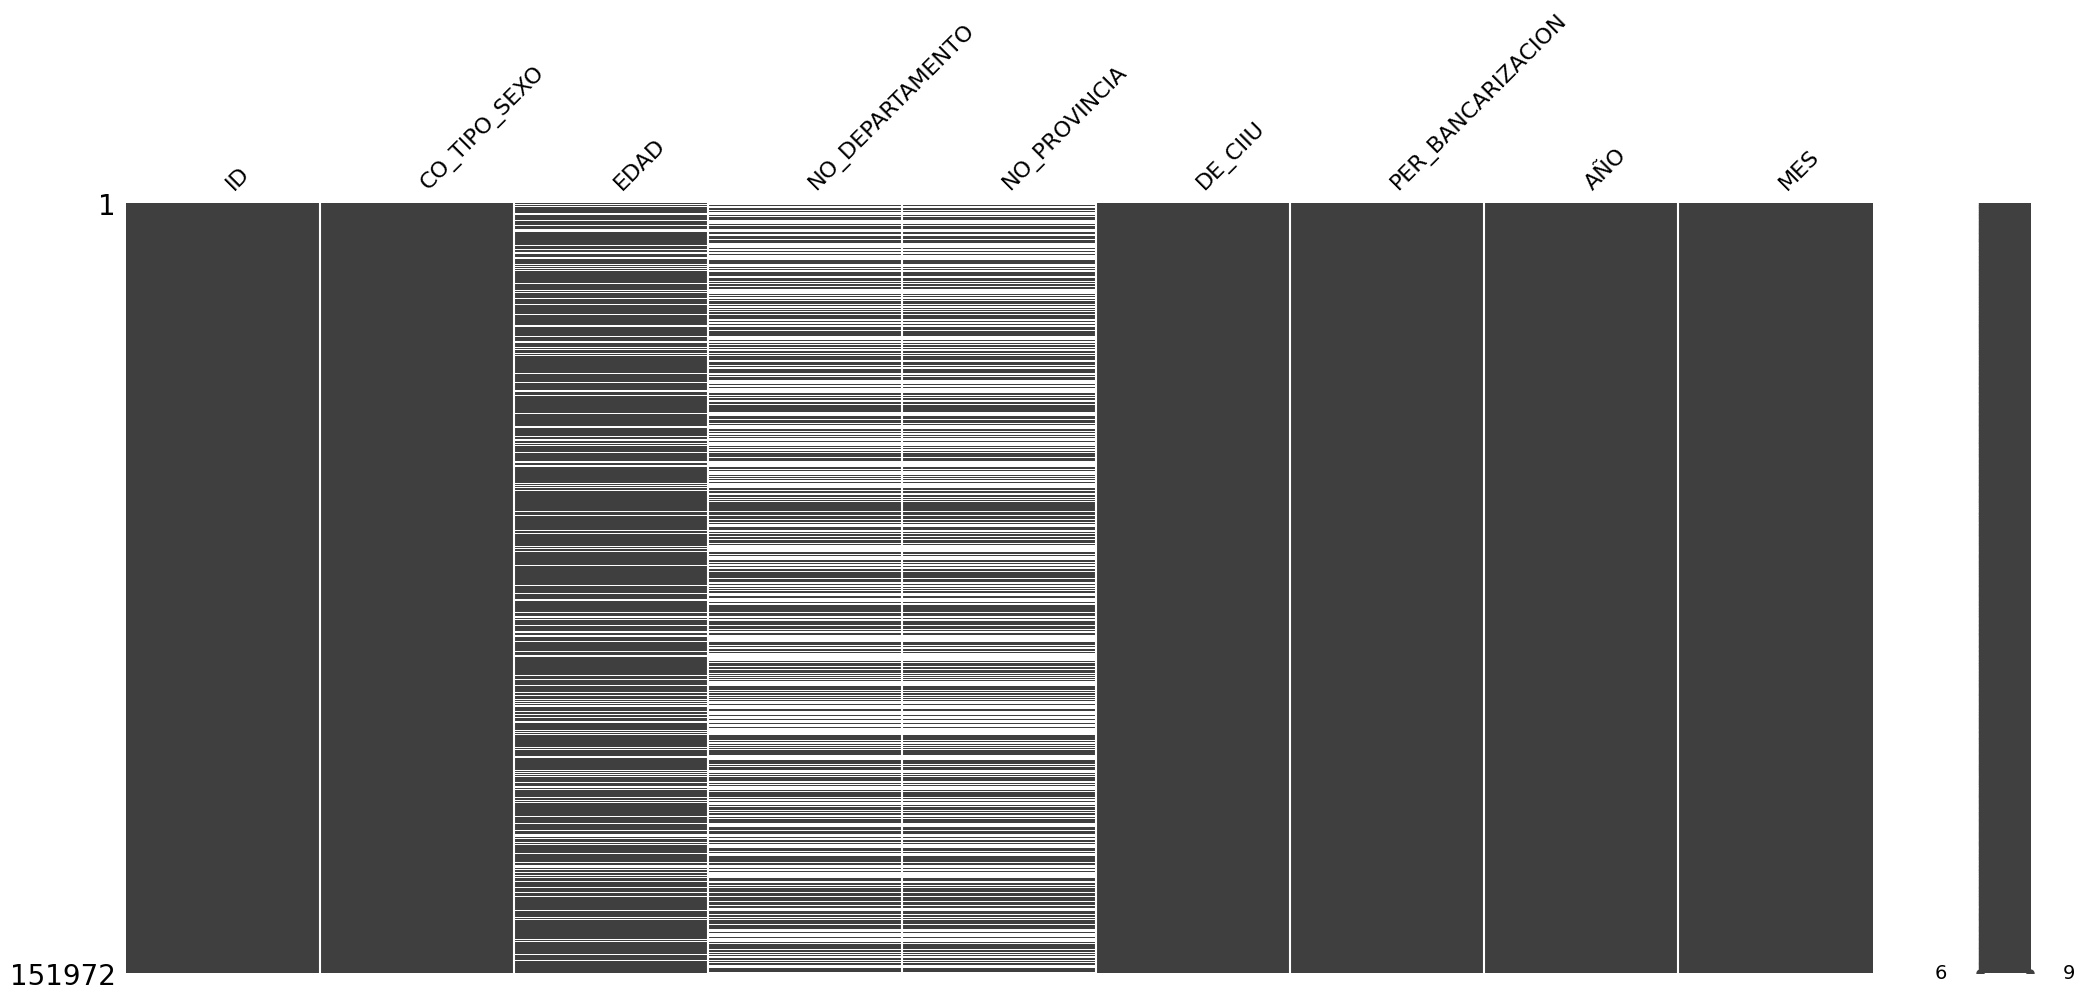

In [312]:
import missingno as msno
msno.matrix(dfc) #Observamos un patron en los missing en las variables NO_DEPARTAMENTO Y NO_PROVINCIA

### **TRABAJAMOS CON LA TABLA BALANCES PRIMERO**
------------------------


In [313]:
dfb.info() #Tenemos los datos completos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367748 entries, 0 to 1367747
Data columns (total 29 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   PERIODO                          1367748 non-null  int64  
 1   ID                               1367748 non-null  object 
 2   CANT_EMP_NEG                     1367748 non-null  int64  
 3   CANT_EMP_CONS                    1367748 non-null  int64  
 4   CANT_EMP_HIPOT                   1367748 non-null  int64  
 5   SALDO_MED_EMP                    1367748 non-null  float64
 6   SALDO_PEQ_EMP                    1367748 non-null  float64
 7   SALDO_MIC_EMP                    1367748 non-null  float64
 8   SALDO_CONS_REV                   1367748 non-null  float64
 9   SALDO_CONS_NO_REV                1367748 non-null  float64
 10  SALDO_HIPOT                      1367748 non-null  float64
 11  SALDO_VENCIDO                    1367748 non-null 

In [314]:

# data continua del cliente
var_1 = ['SALDO_MED_EMP', 'SALDO_PEQ_EMP','SALDO_MIC_EMP','SALDO_CONS_REV','SALDO_CONS_NO_REV',
         'SALDO_HIPOT','SALDO_VENCIDO','SALDO_DOLA_NEG','SALDO_DOLA_CONS', 'SALDO_DOLA_HIPOT', 'MAX_LINEA_DISP_U6M']

# data discreta
var_2 = ['CANT_EMP_NEG', 'CANT_EMP_CONS', 'CANT_EMP_HIPOT','CANT_EMP_DOL_NEG','CANT_EMP_DOL_CONS','CANT_EMP_DOL_HIPOT']

In [315]:
dfb.describe()

,PERIODO,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,...,Saldo_Total,Relacion_Saldo_Linea_Credito,Variacion_SALDO_MED_EMP,Variacion_SALDO_PEQ_EMP,Variacion_SALDO_MIC_EMP,Variacion_Consumo_Revolvente,Variacion_Consumo_NO_Revolvente,Cambios_Linea_Credito,Meses_sin_Saldos_Vencidos,Frecuencia_Transacciones
count,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,...,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06
mean,2.023050e+05,1.069871e+00,8.310946e-01,2.999017e-02,1.848944e+03,1.286906e+04,3.072459e+03,1.461633e+03,5.552291e+03,4.895342e+03,...,2.969973e+04,1.477306e+04,1.949773e+01,1.220049e+02,-8.810244e+00,5.833937e+00,1.198077e+00,5.733623e+01,8.812186e-01,6.616891e-01
std,2.581990e+00,8.547398e-01,1.100287e+00,1.732735e-01,4.253059e+04,3.084325e+04,9.974915e+03,6.819183e+03,4.436123e+04,4.698070e+04,...,8.679995e+04,5.626083e+04,8.642621e+03,9.533028e+03,5.631653e+03,2.352597e+03,1.463074e+04,3.122761e+03,3.235312e-01,4.942692e-01
min,2.023010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.545071e+04,-9.132264e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.545071e+04,-1.545071e+04,-1.859527e+06,-1.571723e+06,-1.367220e+06,-1.749281e+05,-1.411360e+07,-2.516441e+05,0.000000e+00,0.000000e+00
25%,2.023030e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.430000e+03,1.184899e+00,0.000000e+00,0.000000e+00,-8.117010e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,2.023050e+05,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,9.360955e+03,1.286337e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,2.023070e+05,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,9.416638e+03,2.434449e+03,2.320500e+02,2.039154e+03,0.000000e+00,...,3.130754e+04,1.234545e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
max,2.023090e+05,1.000000e+01,1.400000e+01,3.000000e+00,1.020302e+07,1.571723e+06,1.383252e+06,3.953836e+05,1.476193e+07,2.413089e+06,...,1.491668e+07,1.491668e+07,1.926248e+06,1.046913e+06,1.383252e+06,2.115508e+05,3.935238e+06,4.311230e+05,1.000000e+00,2.000000e+00


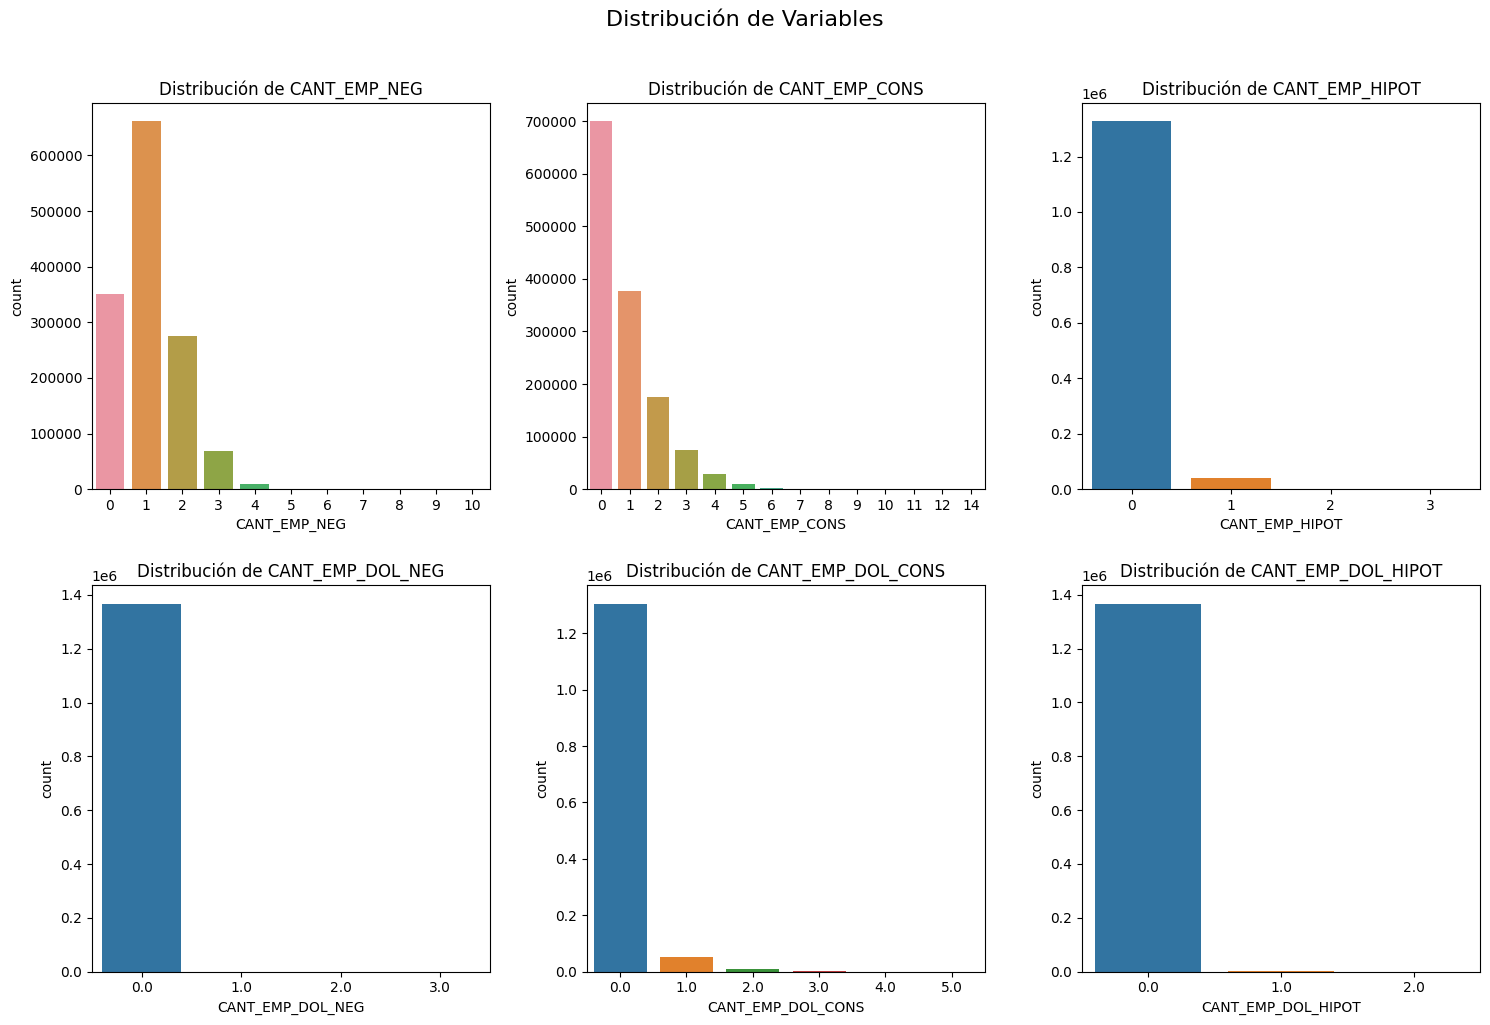

In [316]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el diseño de los subgráficos en una cuadrícula 2x3
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Distribución de Variables', y=1.02, fontsize=16)

# Itera sobre las variables y genera los gráficos en la cuadrícula
for i, var in enumerate(var_2):
    row = i // 3  # Calcula el número de fila
    col = i % 3   # Calcula el número de columna
    sns.countplot(x=var, data=dfb, ax=axes[row, col])
    axes[row, col].set_title(f'Distribución de {var}')

# Ajusta el espacio entre subgráficos y evita superposiciones
plt.tight_layout()

# Muestra los gráficos
plt.show()

In [317]:
dfb.columns

Index(['PERIODO', 'ID', 'CANT_EMP_NEG', 'CANT_EMP_CONS', 'CANT_EMP_HIPOT',
       'SALDO_MED_EMP', 'SALDO_PEQ_EMP', 'SALDO_MIC_EMP', 'SALDO_CONS_REV',
       'SALDO_CONS_NO_REV', 'SALDO_HIPOT', 'SALDO_VENCIDO', 'CANT_EMP_DOL_NEG',
       'SALDO_DOLA_NEG', 'CANT_EMP_DOL_CONS', 'SALDO_DOLA_CONS',
       'CANT_EMP_DOL_HIPOT', 'SALDO_DOLA_HIPOT', 'MAX_LINEA_DISP_U6M',
       'Saldo_Total', 'Relacion_Saldo_Linea_Credito',
       'Variacion_SALDO_MED_EMP', 'Variacion_SALDO_PEQ_EMP',
       'Variacion_SALDO_MIC_EMP', 'Variacion_Consumo_Revolvente',
       'Variacion_Consumo_NO_Revolvente', 'Cambios_Linea_Credito',
       'Meses_sin_Saldos_Vencidos', 'Frecuencia_Transacciones'],
      dtype='object')

In [318]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367748 entries, 0 to 1367747
Data columns (total 29 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   PERIODO                          1367748 non-null  int64  
 1   ID                               1367748 non-null  object 
 2   CANT_EMP_NEG                     1367748 non-null  int64  
 3   CANT_EMP_CONS                    1367748 non-null  int64  
 4   CANT_EMP_HIPOT                   1367748 non-null  int64  
 5   SALDO_MED_EMP                    1367748 non-null  float64
 6   SALDO_PEQ_EMP                    1367748 non-null  float64
 7   SALDO_MIC_EMP                    1367748 non-null  float64
 8   SALDO_CONS_REV                   1367748 non-null  float64
 9   SALDO_CONS_NO_REV                1367748 non-null  float64
 10  SALDO_HIPOT                      1367748 non-null  float64
 11  SALDO_VENCIDO                    1367748 non-null 

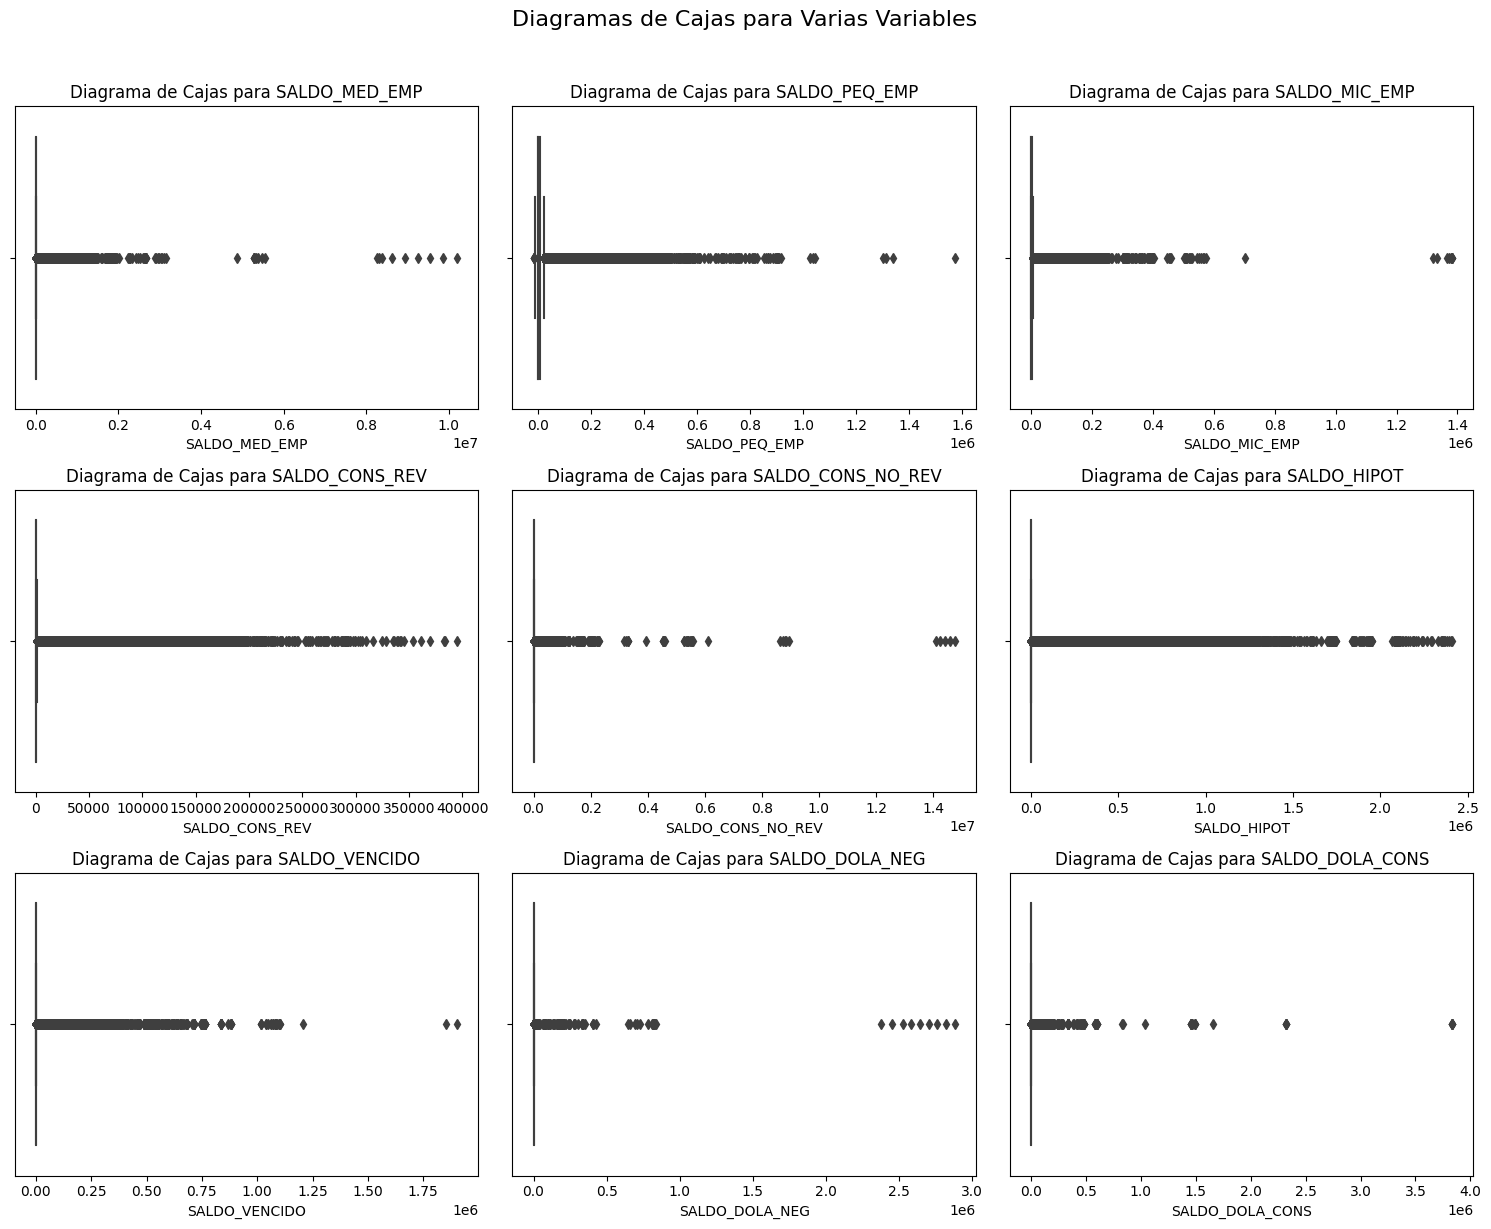

In [319]:
# Configura el diseño de los subgráficos en una cuadrícula de 3x3
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Diagramas de Cajas para Varias Variables', y=1.02, fontsize=16)

# Itera sobre las variables y genera los boxplots en la cuadrícula
for i, var in enumerate(['SALDO_MED_EMP',
 'SALDO_PEQ_EMP',
 'SALDO_MIC_EMP',
 'SALDO_CONS_REV',
 'SALDO_CONS_NO_REV',
 'SALDO_HIPOT',
 'SALDO_VENCIDO',
 'SALDO_DOLA_NEG',
 'SALDO_DOLA_CONS']):

    # Calcula la posición del subgráfico en la cuadrícula
    row = i // 3
    col = i % 3

    sns.boxplot(x=dfb[var], ax=axes[row, col])
    axes[row, col].set_title(f'Diagrama de Cajas para {var}')

# Ajusta el espacio entre subgráficos y evita superposiciones
plt.tight_layout()

# Muestra los boxplots
plt.show()

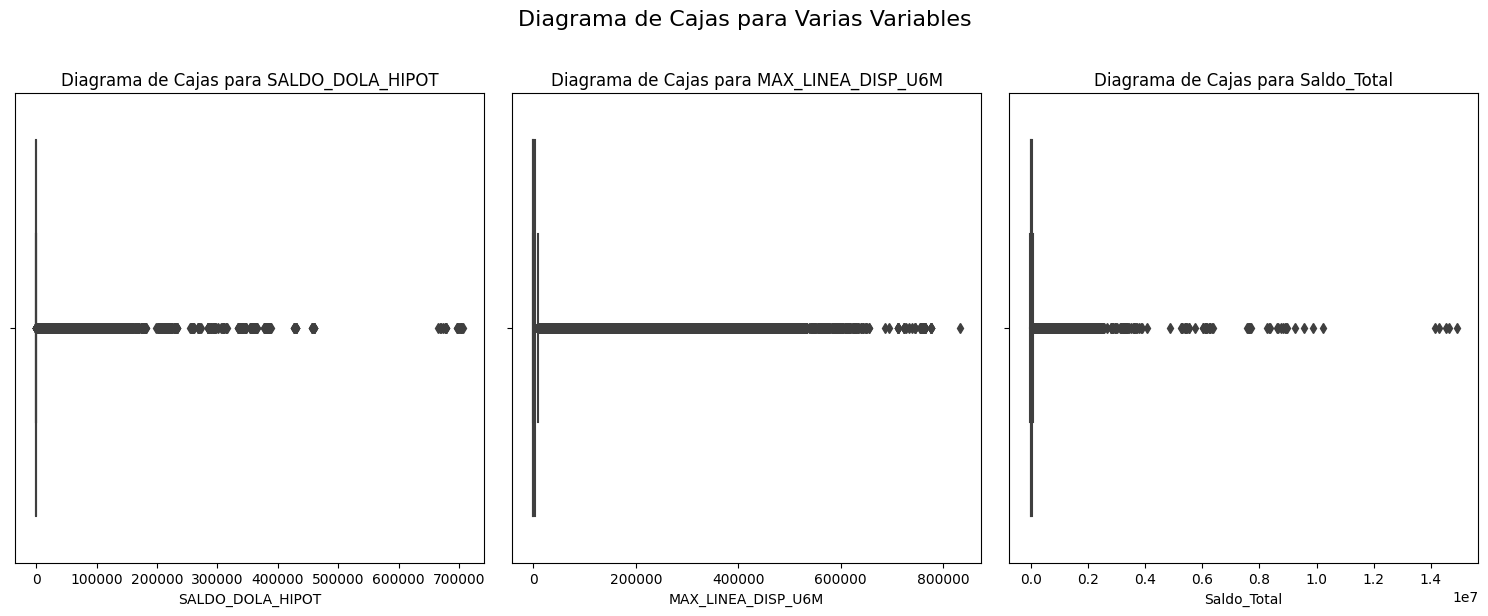

In [320]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
fig.suptitle('Diagrama de Cajas para Varias Variables', y=1.02, fontsize=16)

# Itera sobre las variables y genera los boxplots en la cuadrícula
for i, var in enumerate([ 'SALDO_DOLA_HIPOT',
 'MAX_LINEA_DISP_U6M',
               'Saldo_Total'
                          ]):
    # Elimina valores nulos antes de trazar el boxplot
    data_without_na = dfb[var].dropna()
    sns.boxplot(x=data_without_na, ax=axes[i])
    axes[i].set_title(f'Diagrama de Cajas para {var}')

# Ajusta el espacio entre subgráficos y evita superposiciones
plt.tight_layout()

# Muestra los boxplots
plt.show()

In [321]:
dfb[var_1].describe()

,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,SALDO_VENCIDO,SALDO_DOLA_NEG,SALDO_DOLA_CONS,SALDO_DOLA_HIPOT,MAX_LINEA_DISP_U6M
count,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06
mean,1.848944e+03,1.286906e+04,3.072459e+03,1.461633e+03,5.552291e+03,4.895342e+03,1.410466e+03,3.881828e+01,1.192071e+02,1.071938e+02,1.033724e+04
std,4.253059e+04,3.084325e+04,9.974915e+03,6.819183e+03,4.436123e+04,4.698070e+04,1.382206e+04,7.403591e+03,1.029929e+04,5.026280e+03,3.454299e+04
min,0.000000e+00,-1.545071e+04,-9.132264e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,9.416638e+03,2.434449e+03,2.320500e+02,2.039154e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.740000e+03
max,1.020302e+07,1.571723e+06,1.383252e+06,3.953836e+05,1.476193e+07,2.413089e+06,1.903748e+06,2.880937e+06,3.836260e+06,7.066121e+05,8.328511e+05


In [322]:
dfb_agp = dfb.groupby('ID').mean()


In [323]:
dfb_agp.sample(5)

,PERIODO,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,...,Saldo_Total,Relacion_Saldo_Linea_Credito,Variacion_SALDO_MED_EMP,Variacion_SALDO_PEQ_EMP,Variacion_SALDO_MIC_EMP,Variacion_Consumo_Revolvente,Variacion_Consumo_NO_Revolvente,Cambios_Linea_Credito,Meses_sin_Saldos_Vencidos,Frecuencia_Transacciones
ID,,,,,,,,,,,,,,,,,,,,,
ee53531e708e4468b51f98a6ff1f64a9,202305.0,1.000000,0.555556,0.0,0.0,0.000000,1866.0843,0.0,2065.683711,0.0,...,3931.768011,3931.768011,0.0,0.000000,-141.8886,0.0,355.9621,0.0,1.000000,1.000000
e06cf6a46779489d9ebe1c53b83eb268,202305.0,1.000000,0.000000,0.0,0.0,0.000000,1343.7972,0.0,0.000000,0.0,...,1343.797200,1343.797200,0.0,0.000000,-335.9493,0.0,0.0000,0.0,0.444444,0.444444
670d5d95eb1046549b90082600c25901,202305.0,1.111111,0.000000,0.0,0.0,22871.923022,0.0000,0.0,0.000000,0.0,...,22871.923022,22871.923022,0.0,106.159333,0.0000,0.0,0.0000,0.0,1.000000,1.000000
4ea6cb884d804ea989a786804f6f0eb6,202305.0,2.000000,0.000000,0.0,0.0,22750.926800,0.0000,0.0,0.000000,0.0,...,22750.926800,68.942202,0.0,0.000000,0.0000,0.0,0.0000,0.0,0.000000,1.000000
95ee28ce9f074fe68a33b1c83c7c3b3f,202305.0,1.000000,0.000000,0.0,0.0,0.000000,1286.6031,0.0,0.000000,0.0,...,1286.603100,1286.603100,0.0,0.000000,49.5144,0.0,0.0000,0.0,1.000000,1.000000


In [324]:
# Redondea las columnas seleccionadas
dfb_agp[var_2] = dfb_agp[var_2].round(0)


In [325]:
dfb_agp.head(5)

,PERIODO,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,...,Saldo_Total,Relacion_Saldo_Linea_Credito,Variacion_SALDO_MED_EMP,Variacion_SALDO_PEQ_EMP,Variacion_SALDO_MIC_EMP,Variacion_Consumo_Revolvente,Variacion_Consumo_NO_Revolvente,Cambios_Linea_Credito,Meses_sin_Saldos_Vencidos,Frecuencia_Transacciones
ID,,,,,,,,,,,,,,,,,,,,,
00000ae64b2d4ea7b318f3caa49fb832,202305.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
00002e673be949b1afe485e71ff71048,202305.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
0000e7adc30c476ba07265c60676562c,202305.0,2.0,2.0,0.0,0.0,38978.653689,0.0,0.0,27035.078167,0.0,...,66013.731856,11.196359,0.0,3115.427467,0.0,0.0,-1713.468600,0.0,1.0,1.0
00014b0427554bbbad91e0d8aeab3118,202305.0,2.0,0.0,0.0,0.0,42683.458622,0.0,0.0,0.000000,0.0,...,42683.458622,42683.458622,0.0,-829.064578,0.0,0.0,0.000000,0.0,1.0,1.0
0001efa922ff405384514b5c6ed18294,202305.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,4329.417411,0.0,...,4329.417411,4329.417411,0.0,0.000000,0.0,0.0,-202.772689,0.0,1.0,0.0


In [326]:
dfb_agp.drop(['Cambios_Linea_Credito', 'Meses_sin_Saldos_Vencidos','Frecuencia_Transacciones'], axis=1, inplace=True)

In [327]:
dfb_agp = pd.merge(dfb_agp, sumtable1, on='ID', how='inner')

In [328]:
dfb_agp.sample(5)

,ID,PERIODO,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,...,Saldo_Total,Relacion_Saldo_Linea_Credito,Variacion_SALDO_MED_EMP,Variacion_SALDO_PEQ_EMP,Variacion_SALDO_MIC_EMP,Variacion_Consumo_Revolvente,Variacion_Consumo_NO_Revolvente,Cambios_Linea_Credito,Meses_sin_Saldos_Vencidos,Frecuencia_Transacciones
15301,19e90a415c9d469c8e1b71b90e9a2952,202305.0,0.0,3.0,0.0,0.0,0.000000,0.0000,3884.624178,68670.927033,...,72555.551211,4.046601,0.0,0.00,0.0000,14.833000,-1118.920233,0.0,9,0
132880,dfa594ebaa334206903a9c7d09b57738,202305.0,0.0,2.0,0.0,0.0,0.000000,0.0000,2142.730489,2749.282778,...,4892.013267,0.684198,0.0,0.00,0.0000,353.496578,-745.508767,0.0,9,0
98795,a6038c5f85fd4fb0b8cc0bc380b5a9fd,202305.0,2.0,0.0,0.0,0.0,0.000000,15853.1040,0.000000,0.000000,...,15853.104000,15853.104000,0.0,0.00,238.9581,0.000000,0.000000,0.0,9,9
83623,8c6ec7176e204f44b95188da333699b3,202305.0,1.0,0.0,0.0,0.0,34284.249378,0.0000,0.000000,0.000000,...,34284.249378,34284.249378,0.0,5777.52,0.0000,0.000000,0.000000,0.0,9,9
94147,9e3008a4dedf449b842be82ec88673a6,202305.0,1.0,0.0,0.0,0.0,0.000000,4278.9411,0.000000,0.000000,...,4278.941100,4278.941100,0.0,0.00,76.0437,0.000000,0.000000,0.0,9,9


In [329]:
dfb_agp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151972 entries, 0 to 151971
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ID                               151972 non-null  object 
 1   PERIODO                          151972 non-null  float64
 2   CANT_EMP_NEG                     151972 non-null  float64
 3   CANT_EMP_CONS                    151972 non-null  float64
 4   CANT_EMP_HIPOT                   151972 non-null  float64
 5   SALDO_MED_EMP                    151972 non-null  float64
 6   SALDO_PEQ_EMP                    151972 non-null  float64
 7   SALDO_MIC_EMP                    151972 non-null  float64
 8   SALDO_CONS_REV                   151972 non-null  float64
 9   SALDO_CONS_NO_REV                151972 non-null  float64
 10  SALDO_HIPOT                      151972 non-null  float64
 11  SALDO_VENCIDO                    151972 non-null  float64
 12  CA

In [330]:
dfb_agp[var_2] = dfb_agp[var_2].astype(int)


In [331]:
dfb_agp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151972 entries, 0 to 151971
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ID                               151972 non-null  object 
 1   PERIODO                          151972 non-null  float64
 2   CANT_EMP_NEG                     151972 non-null  int64  
 3   CANT_EMP_CONS                    151972 non-null  int64  
 4   CANT_EMP_HIPOT                   151972 non-null  int64  
 5   SALDO_MED_EMP                    151972 non-null  float64
 6   SALDO_PEQ_EMP                    151972 non-null  float64
 7   SALDO_MIC_EMP                    151972 non-null  float64
 8   SALDO_CONS_REV                   151972 non-null  float64
 9   SALDO_CONS_NO_REV                151972 non-null  float64
 10  SALDO_HIPOT                      151972 non-null  float64
 11  SALDO_VENCIDO                    151972 non-null  float64
 12  CA

In [332]:
#dfb_agp.reset_index(inplace=True) #Retornamos el ID dentro de las variables para podes hacer un INNER JOIN con la tabla df_train

In [333]:
dfb_agp.sample(5)

,ID,PERIODO,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,...,Saldo_Total,Relacion_Saldo_Linea_Credito,Variacion_SALDO_MED_EMP,Variacion_SALDO_PEQ_EMP,Variacion_SALDO_MIC_EMP,Variacion_Consumo_Revolvente,Variacion_Consumo_NO_Revolvente,Cambios_Linea_Credito,Meses_sin_Saldos_Vencidos,Frecuencia_Transacciones
32544,370664b403244aaaaaaf3769f54aad9a,202305.0,1,0,0,0.0,0.000000,152.8785,0.000000,0.000000,...,152.878500,152.878500,0.0,0.000000,62.2647,0.0000,0.000000,0.00,5,2
41923,46dd2ac214f849959f500bef5b4ea25d,202305.0,0,3,0,0.0,0.000000,0.0000,10124.938056,0.000000,...,10124.938056,0.051995,0.0,0.000000,0.0000,367.0485,0.000000,74474.07,5,0
54062,5aeff74d859249efb8c4ad5fa0827bca,202305.0,1,0,0,0.0,13656.199333,1738.7811,0.000000,0.000000,...,15394.980433,15394.980433,0.0,-2880.736089,838.7811,0.0000,0.000000,0.00,9,9
39947,43ab921472924759ac16133feb3cb218,202305.0,0,1,0,0.0,0.000000,0.0000,0.000000,925.571733,...,925.571733,925.571733,0.0,0.000000,0.0000,0.0000,-73.789767,0.00,9,0
62549,690dd45b3528409b8b9089a2d0b3d329,202305.0,0,1,0,0.0,0.000000,14089.1220,0.000000,8997.871378,...,23086.993378,1.878847,0.0,0.000000,0.0000,0.0000,287.602378,-10575.40,9,2


In [334]:
dfb_agp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151972 entries, 0 to 151971
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ID                               151972 non-null  object 
 1   PERIODO                          151972 non-null  float64
 2   CANT_EMP_NEG                     151972 non-null  int64  
 3   CANT_EMP_CONS                    151972 non-null  int64  
 4   CANT_EMP_HIPOT                   151972 non-null  int64  
 5   SALDO_MED_EMP                    151972 non-null  float64
 6   SALDO_PEQ_EMP                    151972 non-null  float64
 7   SALDO_MIC_EMP                    151972 non-null  float64
 8   SALDO_CONS_REV                   151972 non-null  float64
 9   SALDO_CONS_NO_REV                151972 non-null  float64
 10  SALDO_HIPOT                      151972 non-null  float64
 11  SALDO_VENCIDO                    151972 non-null  float64
 12  CA

In [335]:
# Realizar un join basado en la columna 'ID'
df = pd.merge(dfb_agp, df_testrain, on='ID', how='inner')

In [336]:
df.sample(5)

,ID,PERIODO,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,...,Relacion_Saldo_Linea_Credito,Variacion_SALDO_MED_EMP,Variacion_SALDO_PEQ_EMP,Variacion_SALDO_MIC_EMP,Variacion_Consumo_Revolvente,Variacion_Consumo_NO_Revolvente,Cambios_Linea_Credito,Meses_sin_Saldos_Vencidos,Frecuencia_Transacciones,TARGET
87426,92d6c739000c4aef9ccb36bf119d2163,202305.0,1,0,0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000,0,0,0.0
132679,df4ed19303234066ae186bfb0f434593,202305.0,0,5,0,0.0,0.000000,0.0,7742.065644,67715.296389,...,3.996060,0.0,0.000000,0.0,99.203144,10719.302444,3020.842,9,0,NaN
32286,369b7952dd254a2ead8619ef3e6919a5,202305.0,1,0,0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000,0,0,0.0
139430,eab4675879284140b411ec951229f0a9,202305.0,0,5,1,0.0,0.000000,0.0,32914.447222,90615.751689,...,4.674198,0.0,0.000000,0.0,3647.111144,-4119.763100,34212.860,9,0,NaN
11672,13cf352c6a1d48f6abd7c47160a89848,202305.0,2,2,0,0.0,89978.852267,0.0,617.282322,34187.059056,...,4.217069,0.0,-2095.774311,0.0,91.010111,-36.150189,1100.000,9,9,NaN


In [337]:
df['TARGET'].value_counts(1) #Observamos que nuestra variable Target esta desbalanceada

0.0    0.849994
1.0    0.150006
Name: TARGET, dtype: float64

In [544]:
# Realizar un join basado en la columna 'ID'
data = pd.merge(df, dfc, on='ID', how='inner')

In [339]:
data.head()

,ID,PERIODO,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,...,Frecuencia_Transacciones,TARGET,CO_TIPO_SEXO,EDAD,NO_DEPARTAMENTO,NO_PROVINCIA,DE_CIIU,PER_BANCARIZACION,AÑO,MES
0,00000ae64b2d4ea7b318f3caa49fb832,202305.0,1,0,0,0.0,0.000000,0.0,0.0,0.000000,...,0,NaN,1,52.0,AREQUIPA,ISLAY,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2007-11-01,2007,11
1,00002e673be949b1afe485e71ff71048,202305.0,1,0,0,0.0,0.000000,0.0,0.0,0.000000,...,0,0.0,1,61.0,HUANCAVELICA,HUANCAVELICA,"VTA. MIN. PRODUCTOS TEXTILES, CALZADO.",2006-01-01,2006,1
2,0000e7adc30c476ba07265c60676562c,202305.0,2,2,0,0.0,38978.653689,0.0,0.0,27035.078167,...,9,NaN,2,49.0,AREQUIPA,AREQUIPA,VTA. MAY. MATERIALES DE CONSTRUCCION.,2006-11-01,2006,11
3,00014b0427554bbbad91e0d8aeab3118,202305.0,2,0,0,0.0,42683.458622,0.0,0.0,0.000000,...,9,0.0,1,43.0,AYACUCHO,HUAMANGA,VTA. MAY. MATERIALES DE CONSTRUCCION.,2006-01-01,2006,1
4,0001efa922ff405384514b5c6ed18294,202305.0,1,1,0,0.0,0.000000,0.0,0.0,4329.417411,...,0,0.0,2,56.0,MOQUEGUA,ILO,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2014-09-01,2014,9


In [340]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151972 entries, 0 to 151971
Data columns (total 38 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   ID                               151972 non-null  object        
 1   PERIODO                          151972 non-null  float64       
 2   CANT_EMP_NEG                     151972 non-null  int64         
 3   CANT_EMP_CONS                    151972 non-null  int64         
 4   CANT_EMP_HIPOT                   151972 non-null  int64         
 5   SALDO_MED_EMP                    151972 non-null  float64       
 6   SALDO_PEQ_EMP                    151972 non-null  float64       
 7   SALDO_MIC_EMP                    151972 non-null  float64       
 8   SALDO_CONS_REV                   151972 non-null  float64       
 9   SALDO_CONS_NO_REV                151972 non-null  float64       
 10  SALDO_HIPOT                      151972 non-

In [341]:
#ELIMINAMOS VARIABLES QUE NO USAREMOS EN EL MODELO

data = data.drop(['PERIODO','PER_BANCARIZACION'], axis=1)

In [342]:
ID = data["ID"]
TAR = data["TARGET"]

In [343]:
data = data.drop(['ID','TARGET'], axis=1)

<Axes: >

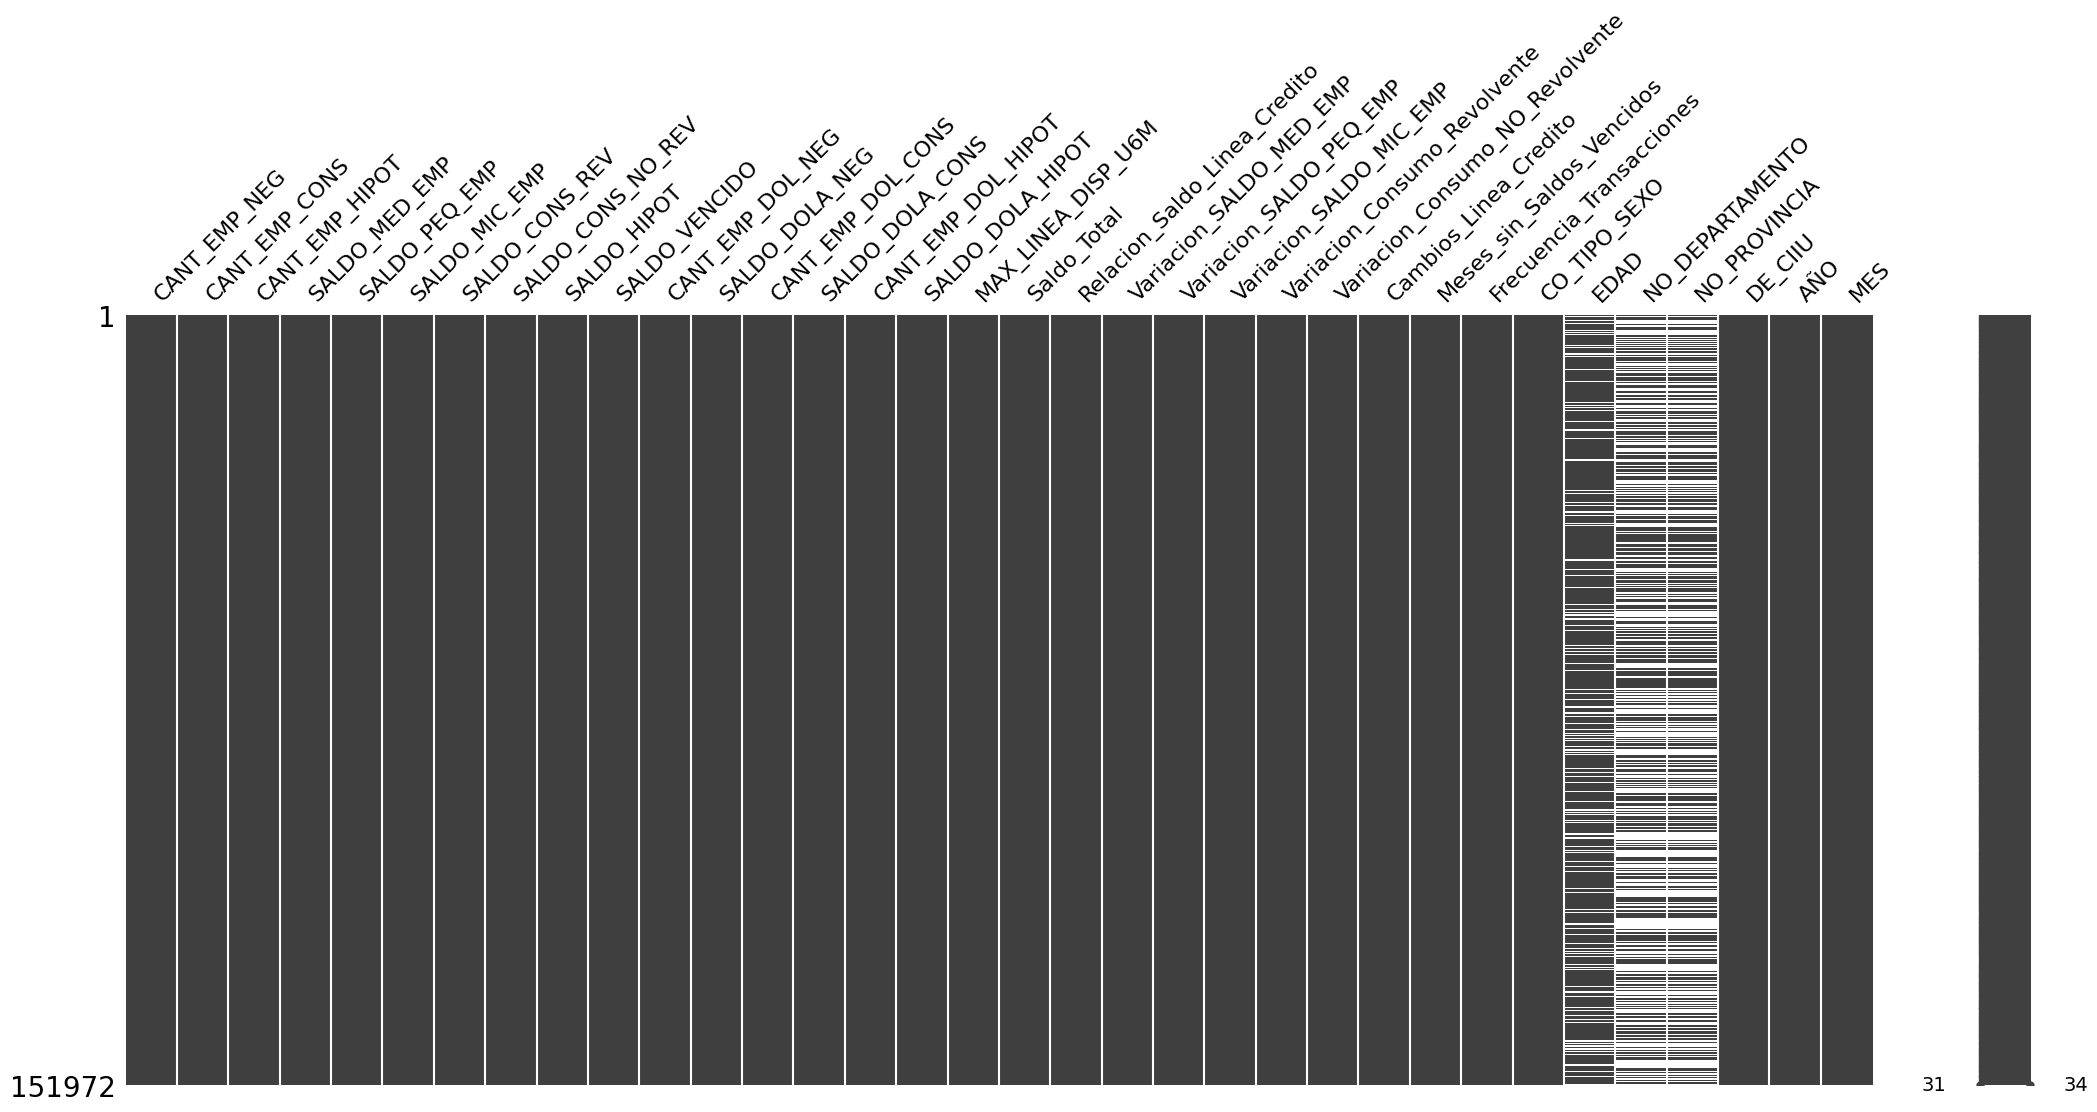

In [344]:
msno.matrix(data)

In [345]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151972 entries, 0 to 151971
Data columns (total 34 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   CANT_EMP_NEG                     151972 non-null  int64  
 1   CANT_EMP_CONS                    151972 non-null  int64  
 2   CANT_EMP_HIPOT                   151972 non-null  int64  
 3   SALDO_MED_EMP                    151972 non-null  float64
 4   SALDO_PEQ_EMP                    151972 non-null  float64
 5   SALDO_MIC_EMP                    151972 non-null  float64
 6   SALDO_CONS_REV                   151972 non-null  float64
 7   SALDO_CONS_NO_REV                151972 non-null  float64
 8   SALDO_HIPOT                      151972 non-null  float64
 9   SALDO_VENCIDO                    151972 non-null  float64
 10  CANT_EMP_DOL_NEG                 151972 non-null  int64  
 11  SALDO_DOLA_NEG                   151972 non-null  float64
 12  CA

# **EDA**    
##### **PARA EL EDA NO REALIZAR EL DROP AL TARGET EN EL CODIGO ANTERIOR**
---

TARGET                  
              count     sum      mean
CANT_EMP_NEG                         
0             23054  7208.0  0.312657
1             43921  4566.0  0.103959
2             19225  1592.0  0.082809
3              4412   275.0  0.062330
4               529    35.0  0.066163
5                39     2.0  0.051282
6                 2     0.0  0.000000
10                1     0.0  0.000000

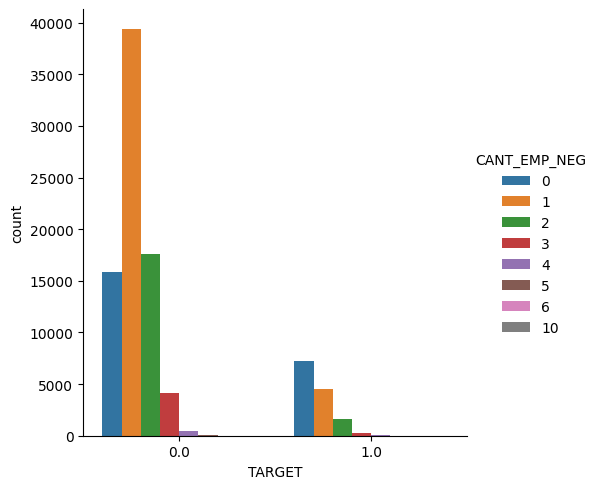

In [545]:
sns.catplot(x='TARGET',data=data,hue='CANT_EMP_NEG',kind="count")
data[['CANT_EMP_NEG', 'TARGET']].groupby(['CANT_EMP_NEG'], as_index=False).agg(['count','sum','mean'])

TARGET                  
               count     sum      mean
CANT_EMP_CONS                         
0              45931  4542.0  0.098887
1              25314  4718.0  0.186379
2              12260  2797.0  0.228140
3               5065  1100.0  0.217177
4               1824   342.0  0.187500
5                575   135.0  0.234783
6                171    35.0  0.204678
7                 34     6.0  0.176471
8                  7     2.0  0.285714
9                  2     1.0  0.500000

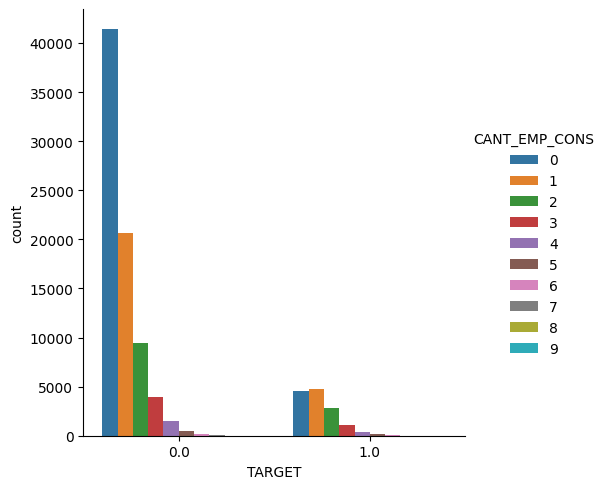

In [546]:
sns.catplot(x='TARGET',data=data,hue='CANT_EMP_CONS',kind="count")
data[['CANT_EMP_CONS', 'TARGET']].groupby(['CANT_EMP_CONS'], as_index=False).agg(['count','sum','mean'])

TARGET                   
                    count      sum      mean
CANT_EMP_DOL_HIPOT                          
0                   91069  13597.0  0.149304
1                     112     79.0  0.705357
2                       2      2.0  1.000000

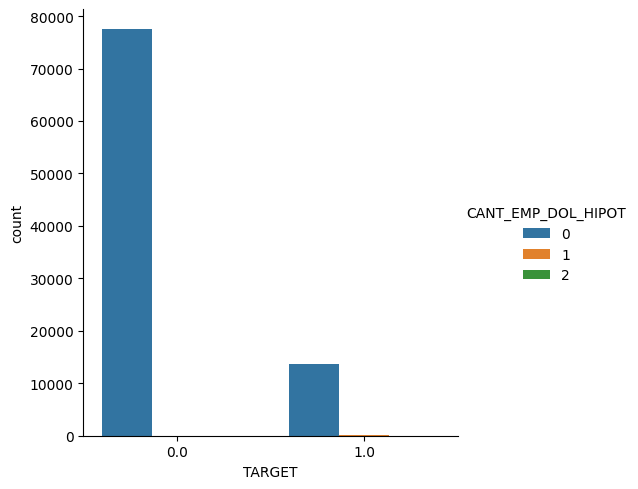

In [547]:
sns.catplot(x='TARGET',data=data,hue='CANT_EMP_DOL_HIPOT',kind="count")
data[['CANT_EMP_DOL_HIPOT', 'TARGET']].groupby(['CANT_EMP_DOL_HIPOT'], as_index=False).agg(['count','sum','mean'])

TARGET                   
                           count      sum      mean
Meses_sin_Saldos_Vencidos                          
0                           5832    106.0  0.018176
1                            789     12.0  0.015209
2                            967     24.0  0.024819
3                           1214     26.0  0.021417
4                           1455     50.0  0.034364
5                           1726     72.0  0.041715
6                           1622     81.0  0.049938
7                           1729     97.0  0.056102
8                           2497    183.0  0.073288
9                          73352  13027.0  0.177596

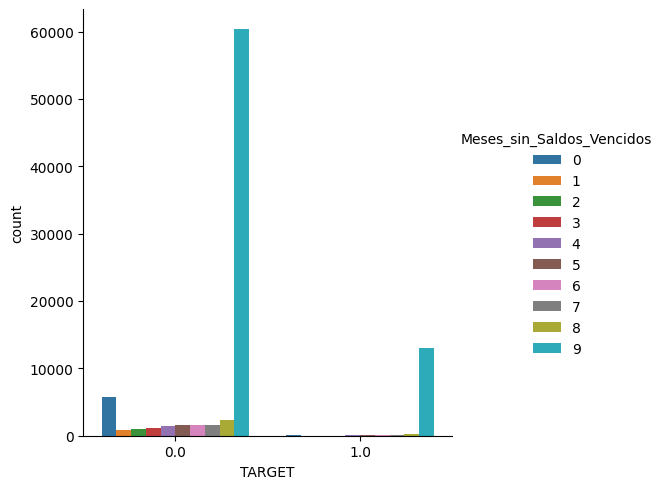

In [548]:
sns.catplot(x='TARGET',data=data,hue='Meses_sin_Saldos_Vencidos',kind="count")
data[['Meses_sin_Saldos_Vencidos', 'TARGET']].groupby(['Meses_sin_Saldos_Vencidos'], as_index=False).agg(['count','sum','mean'])

TARGET                  
                          count     sum      mean
Frecuencia_Transacciones                         
0                         26386  7085.0  0.268514
1                           929   131.0  0.141012
2                          1255   151.0  0.120319
3                          1340   112.0  0.083582
4                          1506   130.0  0.086321
5                          1590   139.0  0.087421
6                          1748   137.0  0.078375
7                          2064   178.0  0.086240
8                          2438   221.0  0.090648
9                         49158  5146.0  0.104683
10                         1149    96.0  0.083551
11                          423    43.0  0.101655
12                          292    31.0  0.106164
13                          256    27.0  0.105469
14                          212    12.0  0.056604
15                          167    15.0  0.089820
16                           81    11.0  0.135802
17                           66     6.0  0.090909
18                          123     7.0  0.056911

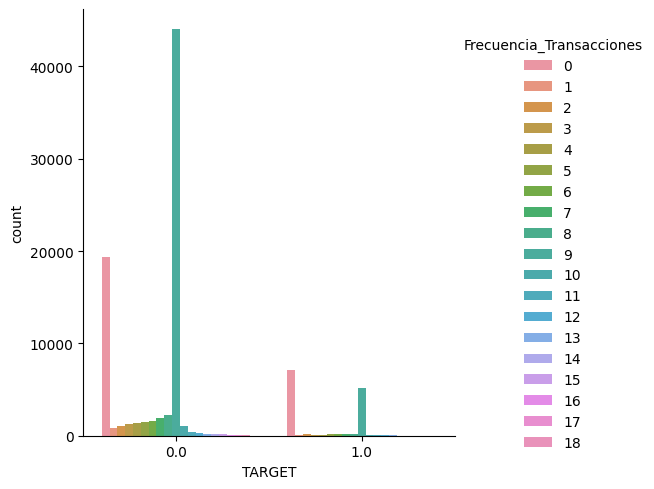

In [549]:
sns.catplot(x='TARGET',data=data,hue='Frecuencia_Transacciones',kind="count")
data[['Frecuencia_Transacciones', 'TARGET']].groupby(['Frecuencia_Transacciones'], as_index=False).agg(['count','sum','mean'])

TARGET                  
              count     sum      mean
CO_TIPO_SEXO                         
1             30000  5076.0  0.169200
2             31343  5747.0  0.183358
3             29840  2855.0  0.095677

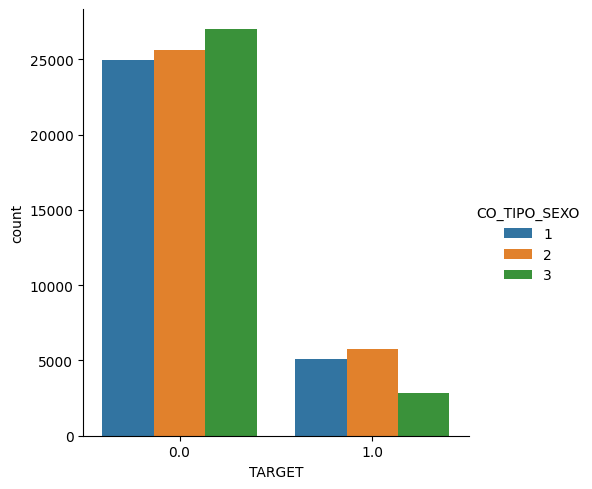

In [550]:
sns.catplot(x='TARGET',data=data,hue='CO_TIPO_SEXO',kind="count")
data[['CO_TIPO_SEXO', 'TARGET']].groupby(['CO_TIPO_SEXO'], as_index=False).agg(['count','sum','mean'])

TARGET                  
                 count     sum      mean
NO_DEPARTAMENTO                         
AMAZONAS           709    51.0  0.071932
ANCASH            2892   416.0  0.143845
APURIMAC           434    49.0  0.112903
AREQUIPA          4291   518.0  0.120718
AYACUCHO          1095    64.0  0.058447
CAJAMARCA         3451   285.0  0.082585
CALLAO            1175   136.0  0.115745
CUSCO              237    18.0  0.075949
HUANCAVELICA      1060   130.0  0.122642
HUANUCO           1142   142.0  0.124343
ICA               1693   251.0  0.148258
JUNIN             3529   482.0  0.136583
LA LIBERTAD       2118   200.0  0.094429
LAMBAYEQUE       10244  2801.0  0.273428
LIMA               488    52.0  0.106557
LORETO             294    38.0  0.129252
MADRE DE DIOS      817    92.0  0.112607
MOQUEGUA           254    38.0  0.149606
PASCO             2861   210.0  0.073401
PIURA             1772   142.0  0.080135
PUNO              1199    94.0  0.078399
SAN MARTIN         683    91.0  0.133236
TACNA              723    68.0  0.094053
TUMBES            1909   476.0  0.249345
UCAYALI            640    66.0  0.103125

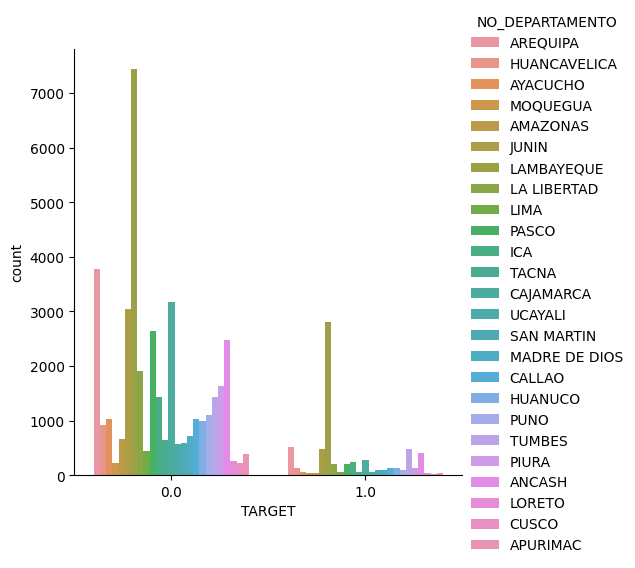

In [551]:
sns.catplot(x='TARGET',data=data,hue='NO_DEPARTAMENTO',kind="count")
data[['NO_DEPARTAMENTO', 'TARGET']].groupby(['NO_DEPARTAMENTO'], as_index=False).agg(['count','sum','mean'])

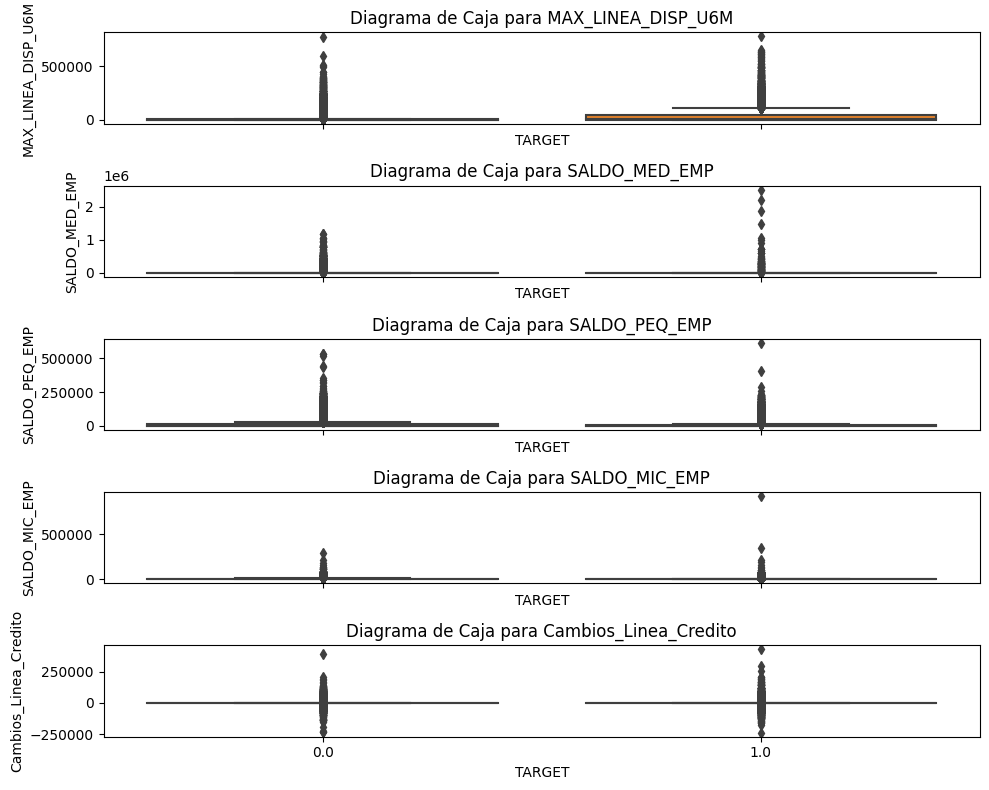

In [347]:
# Selecciona las variables que deseas incluir en los boxplots
variables_interes = ['MAX_LINEA_DISP_U6M', 'SALDO_MED_EMP', 'SALDO_PEQ_EMP', 'SALDO_MIC_EMP', 'Cambios_Linea_Credito']

# Configura el diseño de los subgráficos en una cuadrícula
fig, axes = plt.subplots(nrows=len(variables_interes), figsize=(10, 8), sharex=True)

# Itera sobre las variables y genera los boxplots
for i, var in enumerate(variables_interes):
    sns.boxplot(x='TARGET', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'Diagrama de Caja para {var}')

# Ajusta el espacio entre subgráficos y evita superposiciones
plt.tight_layout()

# Muestra los boxplots
plt.show()

In [ ]:
sns.scatterplot(x="SALDO_MIC_EMP", y="SALDO_PEQ_EMP", data = data, hue="TARGET")

In [350]:
data.columns

Index(['CANT_EMP_NEG', 'CANT_EMP_CONS', 'CANT_EMP_HIPOT', 'SALDO_MED_EMP',
       'SALDO_PEQ_EMP', 'SALDO_MIC_EMP', 'SALDO_CONS_REV', 'SALDO_CONS_NO_REV',
       'SALDO_HIPOT', 'SALDO_VENCIDO', 'CANT_EMP_DOL_NEG', 'SALDO_DOLA_NEG',
       'CANT_EMP_DOL_CONS', 'SALDO_DOLA_CONS', 'CANT_EMP_DOL_HIPOT',
       'SALDO_DOLA_HIPOT', 'MAX_LINEA_DISP_U6M', 'Saldo_Total',
       'Relacion_Saldo_Linea_Credito', 'Variacion_SALDO_MED_EMP',
       'Variacion_SALDO_PEQ_EMP', 'Variacion_SALDO_MIC_EMP',
       'Variacion_Consumo_Revolvente', 'Variacion_Consumo_NO_Revolvente',
       'Cambios_Linea_Credito', 'Meses_sin_Saldos_Vencidos',
       'Frecuencia_Transacciones', 'CO_TIPO_SEXO', 'EDAD', 'NO_DEPARTAMENTO',
       'NO_PROVINCIA', 'DE_CIIU', 'AÑO', 'MES'],
      dtype='object')

### **EDA CON EL PAQUETE SWETVIZ**
#### ***(OPCIONAL)***
---

In [ ]:
# !pip install sweetviz

In [ ]:
#import sweetviz as sv

# Eliminar filas con valores faltantes en la variable objetivo
#df_cleaned = data.dropna(subset=['TARGET'])

# Crear el informe con la variable objetivo limpia
#my_report = sv.analyze([df_cleaned, "Data"], target_feat="TARGET")

# Guardar el informe como un archivo HTML
#my_report.show_html("reporte_sweetviz.html")

## **ELIMINAMOS LA CATEGORIA 3 CON Nan**
---

In [ ]:
import numpy as np

# Reemplazar la categoría '3' con NaN debido a que probablemente sea una variable mal asignada
data['CO_TIPO_SEXO'].replace(3, np.nan, inplace=True)

In [ ]:
data['CO_TIPO_SEXO'].value_counts()

### **IMPUTACION**
---

In [351]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['NO_DEPARTAMENTO'] = label_encoder.fit_transform(data['NO_DEPARTAMENTO'])
data['NO_PROVINCIA'] = label_encoder.fit_transform(data['NO_PROVINCIA'])
data['DE_CIIU'] = label_encoder.fit_transform(data['DE_CIIU'])

#data['PER_BANCARIZACION_Categoria'] = label_encoder.fit_transform(data['PER_BANCARIZACION_Categoria'])

In [352]:
from sklearn.impute import KNNImputer

# Crear un imputador KNN
imputer = KNNImputer(n_neighbors=5,weights="uniform",metric="nan_euclidean")

In [353]:
data.columns

Index(['CANT_EMP_NEG', 'CANT_EMP_CONS', 'CANT_EMP_HIPOT', 'SALDO_MED_EMP',
       'SALDO_PEQ_EMP', 'SALDO_MIC_EMP', 'SALDO_CONS_REV', 'SALDO_CONS_NO_REV',
       'SALDO_HIPOT', 'SALDO_VENCIDO', 'CANT_EMP_DOL_NEG', 'SALDO_DOLA_NEG',
       'CANT_EMP_DOL_CONS', 'SALDO_DOLA_CONS', 'CANT_EMP_DOL_HIPOT',
       'SALDO_DOLA_HIPOT', 'MAX_LINEA_DISP_U6M', 'Saldo_Total',
       'Relacion_Saldo_Linea_Credito', 'Variacion_SALDO_MED_EMP',
       'Variacion_SALDO_PEQ_EMP', 'Variacion_SALDO_MIC_EMP',
       'Variacion_Consumo_Revolvente', 'Variacion_Consumo_NO_Revolvente',
       'Cambios_Linea_Credito', 'Meses_sin_Saldos_Vencidos',
       'Frecuencia_Transacciones', 'CO_TIPO_SEXO', 'EDAD', 'NO_DEPARTAMENTO',
       'NO_PROVINCIA', 'DE_CIIU', 'AÑO', 'MES'],
      dtype='object')

In [354]:
## NO CONSIDERAMOS EN LA IMPUTACION YA QUE NO MEJORAN EL MODELO FINAL

#CANT_EMP_DOL_HIPOT
#SALDO_DOLA_NEG
#SALDO_DOLA_HIPOT
#CANT_EMP_DOL_NEG

In [355]:
CIMP= ['CANT_EMP_NEG', 'CANT_EMP_CONS', 'CANT_EMP_HIPOT', 'SALDO_MED_EMP',
       'SALDO_PEQ_EMP', 'SALDO_MIC_EMP', 'SALDO_CONS_REV', 'SALDO_CONS_NO_REV',
       'SALDO_HIPOT', 'SALDO_VENCIDO',
       'CANT_EMP_DOL_CONS', 'SALDO_DOLA_CONS',
       'MAX_LINEA_DISP_U6M', 'Saldo_Total',
       'Variacion_SALDO_MED_EMP', 'Variacion_SALDO_PEQ_EMP',
       'Variacion_SALDO_MIC_EMP', 'Variacion_Consumo_Revolvente',
       'Variacion_Consumo_NO_Revolvente', 'Cambios_Linea_Credito',
       'Meses_sin_Saldos_Vencidos', 'Frecuencia_Transacciones', 'CO_TIPO_SEXO',
       'EDAD', 'NO_DEPARTAMENTO', 'NO_PROVINCIA', 'DE_CIIU', 'AÑO', 'MES']

In [356]:
df_imputado = pd.DataFrame(imputer.fit_transform(data[CIMP]))
df_imputado

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.0,26052.711556,...,0.000,0.0,0.0,1.0,52.0,3.0,92.0,187.0,2007.0,11.0
1,1.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.0,680.000000,...,0.000,0.0,0.0,1.0,61.0,8.0,79.0,255.0,2006.0,1.0
2,2.0,2.0,0.0,0.0,38978.653689,0.000,0.000000,27035.078167,0.0,0.000000,...,0.000,9.0,9.0,2.0,49.0,3.0,11.0,245.0,2006.0,11.0
3,2.0,0.0,0.0,0.0,42683.458622,0.000,0.000000,0.000000,0.0,0.000000,...,0.000,9.0,9.0,1.0,43.0,4.0,75.0,245.0,2006.0,1.0
4,1.0,1.0,0.0,0.0,0.000000,0.000,0.000000,4329.417411,0.0,0.000000,...,0.000,9.0,0.0,2.0,56.0,17.0,91.0,187.0,2014.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151967,1.0,0.0,0.0,0.0,0.000000,13691.889,0.000000,0.000000,0.0,0.000000,...,0.000,9.0,9.0,2.0,61.0,25.0,155.0,235.0,2006.0,1.0
151968,3.0,0.0,0.0,0.0,0.000000,12296.196,0.000000,0.000000,0.0,0.000000,...,0.000,9.0,9.0,2.0,50.0,13.0,99.0,191.0,2011.0,5.0
151969,0.0,2.0,0.0,0.0,0.000000,0.000,143.507000,6777.638900,0.0,0.000000,...,5312.450,9.0,0.0,3.0,34.0,1.0,84.0,18.0,2018.0,10.0
151970,0.0,2.0,0.0,0.0,0.000000,0.000,1780.832589,11605.451944,0.0,0.000000,...,-137.522,9.0,0.0,2.0,45.0,25.0,155.0,187.0,2006.0,5.0


In [357]:
df_imputado.columns = CIMP

In [358]:
df_imputado

,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,SALDO_VENCIDO,...,Cambios_Linea_Credito,Meses_sin_Saldos_Vencidos,Frecuencia_Transacciones,CO_TIPO_SEXO,EDAD,NO_DEPARTAMENTO,NO_PROVINCIA,DE_CIIU,AÑO,MES
0,1.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.0,26052.711556,...,0.000,0.0,0.0,1.0,52.0,3.0,92.0,187.0,2007.0,11.0
1,1.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.0,680.000000,...,0.000,0.0,0.0,1.0,61.0,8.0,79.0,255.0,2006.0,1.0
2,2.0,2.0,0.0,0.0,38978.653689,0.000,0.000000,27035.078167,0.0,0.000000,...,0.000,9.0,9.0,2.0,49.0,3.0,11.0,245.0,2006.0,11.0
3,2.0,0.0,0.0,0.0,42683.458622,0.000,0.000000,0.000000,0.0,0.000000,...,0.000,9.0,9.0,1.0,43.0,4.0,75.0,245.0,2006.0,1.0
4,1.0,1.0,0.0,0.0,0.000000,0.000,0.000000,4329.417411,0.0,0.000000,...,0.000,9.0,0.0,2.0,56.0,17.0,91.0,187.0,2014.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151967,1.0,0.0,0.0,0.0,0.000000,13691.889,0.000000,0.000000,0.0,0.000000,...,0.000,9.0,9.0,2.0,61.0,25.0,155.0,235.0,2006.0,1.0
151968,3.0,0.0,0.0,0.0,0.000000,12296.196,0.000000,0.000000,0.0,0.000000,...,0.000,9.0,9.0,2.0,50.0,13.0,99.0,191.0,2011.0,5.0
151969,0.0,2.0,0.0,0.0,0.000000,0.000,143.507000,6777.638900,0.0,0.000000,...,5312.450,9.0,0.0,3.0,34.0,1.0,84.0,18.0,2018.0,10.0
151970,0.0,2.0,0.0,0.0,0.000000,0.000,1780.832589,11605.451944,0.0,0.000000,...,-137.522,9.0,0.0,2.0,45.0,25.0,155.0,187.0,2006.0,5.0


In [359]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151972 entries, 0 to 151971
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   CANT_EMP_NEG                     151972 non-null  float64
 1   CANT_EMP_CONS                    151972 non-null  float64
 2   CANT_EMP_HIPOT                   151972 non-null  float64
 3   SALDO_MED_EMP                    151972 non-null  float64
 4   SALDO_PEQ_EMP                    151972 non-null  float64
 5   SALDO_MIC_EMP                    151972 non-null  float64
 6   SALDO_CONS_REV                   151972 non-null  float64
 7   SALDO_CONS_NO_REV                151972 non-null  float64
 8   SALDO_HIPOT                      151972 non-null  float64
 9   SALDO_VENCIDO                    151972 non-null  float64
 10  CANT_EMP_DOL_CONS                151972 non-null  float64
 11  SALDO_DOLA_CONS                  151972 non-null  float64
 12  MA

In [360]:
# Redondear la columna 'float_column' a dos decimales
df_imputado['EDAD'] = df_imputado['EDAD'].round(0)
df_imputado['CO_TIPO_SEXO'] = df_imputado['CO_TIPO_SEXO'].round(0)

<Axes: >

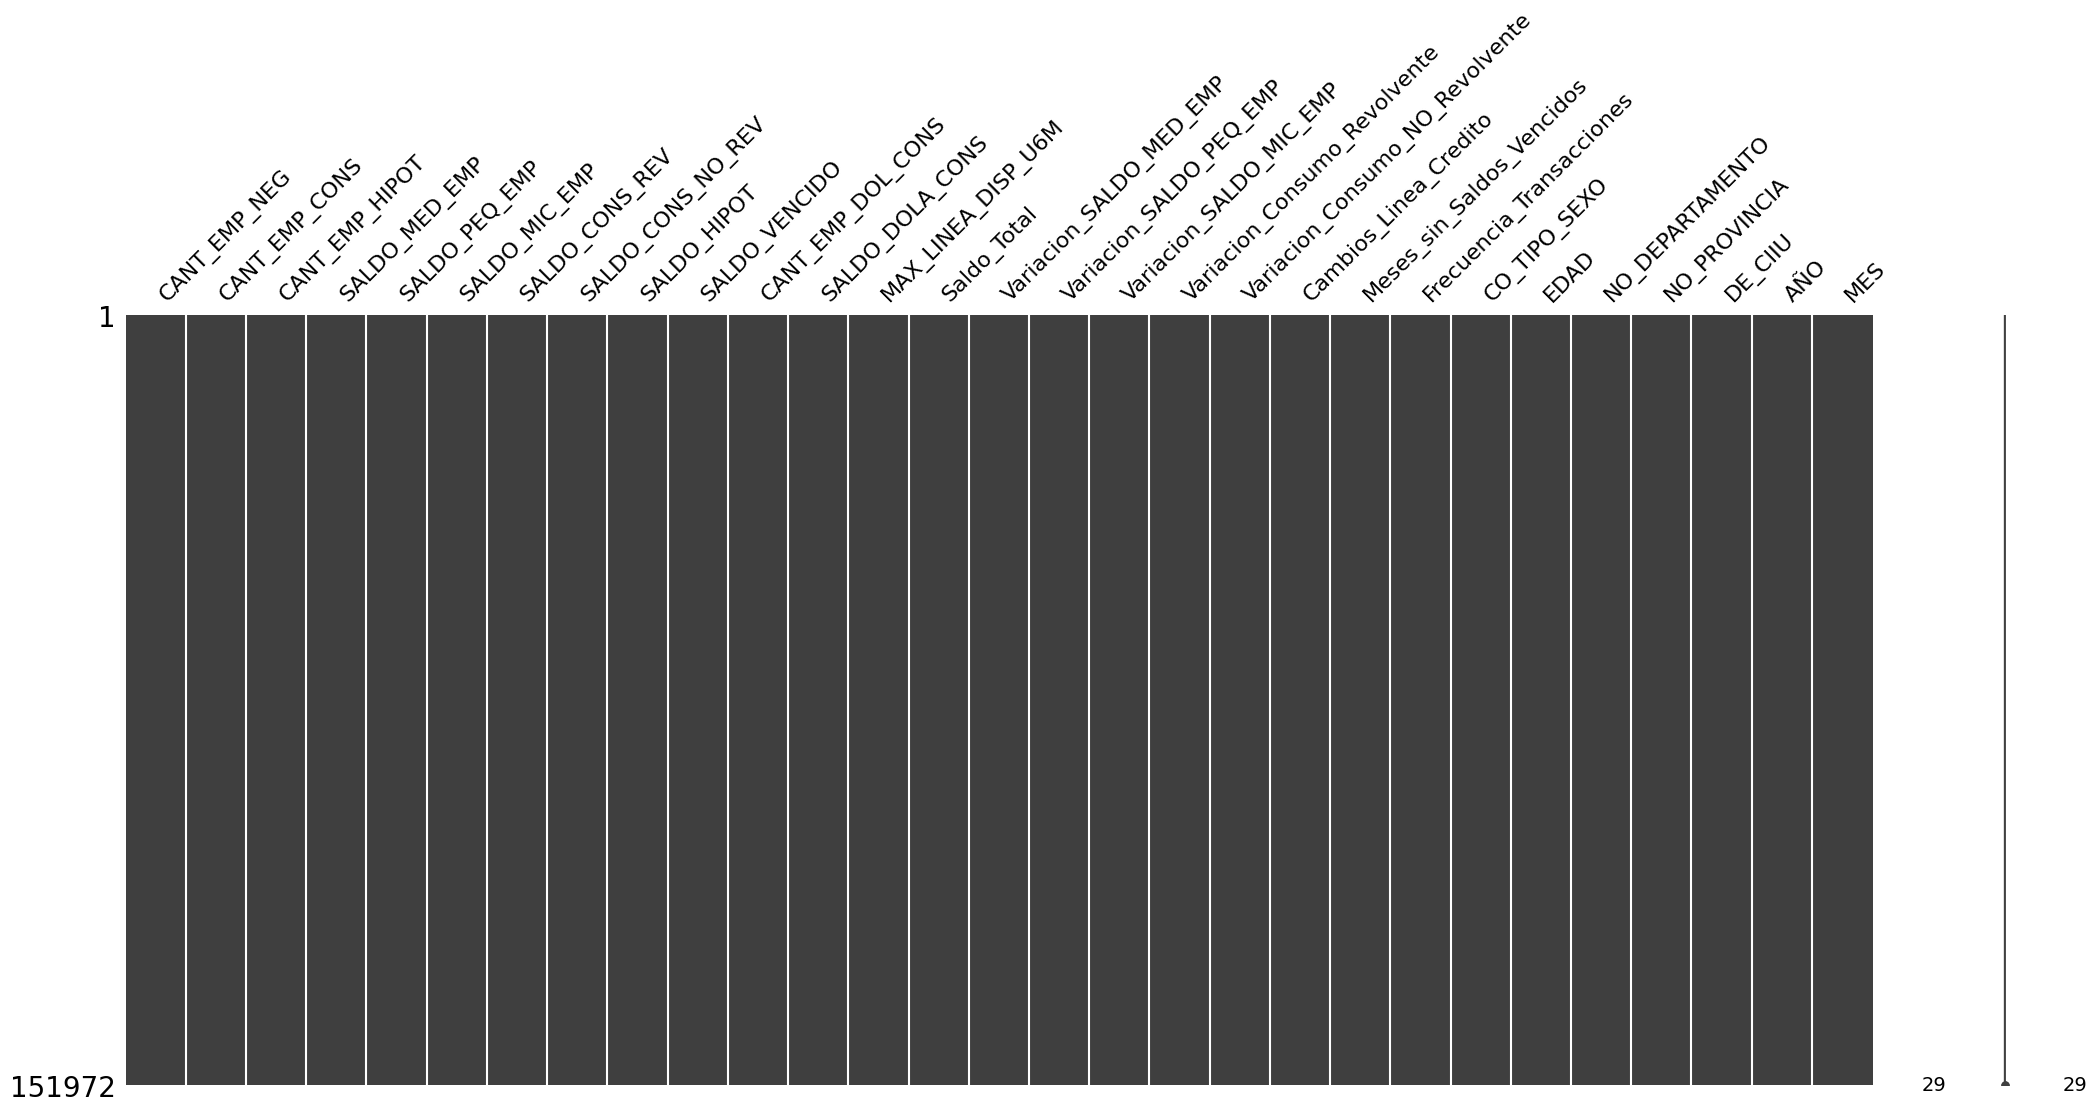

In [361]:
msno.matrix(df_imputado)

In [379]:
df1 = pd.DataFrame({'ID': ID})
df2 = pd.DataFrame({'TARGET': TAR})
data = pd.concat([df1,df_imputado, df2], axis=1)

In [380]:
data

,ID,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,...,Meses_sin_Saldos_Vencidos,Frecuencia_Transacciones,CO_TIPO_SEXO,EDAD,NO_DEPARTAMENTO,NO_PROVINCIA,DE_CIIU,AÑO,MES,TARGET
0,00000ae64b2d4ea7b318f3caa49fb832,1.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.0,...,0.0,0.0,1.0,52.0,3.0,92.0,187.0,2007.0,11.0,NaN
1,00002e673be949b1afe485e71ff71048,1.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.0,...,0.0,0.0,1.0,61.0,8.0,79.0,255.0,2006.0,1.0,0.0
2,0000e7adc30c476ba07265c60676562c,2.0,2.0,0.0,0.0,38978.653689,0.000,0.000000,27035.078167,0.0,...,9.0,9.0,2.0,49.0,3.0,11.0,245.0,2006.0,11.0,NaN
3,00014b0427554bbbad91e0d8aeab3118,2.0,0.0,0.0,0.0,42683.458622,0.000,0.000000,0.000000,0.0,...,9.0,9.0,1.0,43.0,4.0,75.0,245.0,2006.0,1.0,0.0
4,0001efa922ff405384514b5c6ed18294,1.0,1.0,0.0,0.0,0.000000,0.000,0.000000,4329.417411,0.0,...,9.0,0.0,2.0,56.0,17.0,91.0,187.0,2014.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151967,fffe81ac4d864cf5b21d80e1b39b6bde,1.0,0.0,0.0,0.0,0.000000,13691.889,0.000000,0.000000,0.0,...,9.0,9.0,2.0,61.0,25.0,155.0,235.0,2006.0,1.0,NaN
151968,fffebeece7e3462c9ecd043d93bf8828,3.0,0.0,0.0,0.0,0.000000,12296.196,0.000000,0.000000,0.0,...,9.0,9.0,2.0,50.0,13.0,99.0,191.0,2011.0,5.0,0.0
151969,ffff32ee7ea247bab950cfc94c7ba402,0.0,2.0,0.0,0.0,0.000000,0.000,143.507000,6777.638900,0.0,...,9.0,0.0,3.0,34.0,1.0,84.0,18.0,2018.0,10.0,0.0
151970,ffff49668d014875a2c5af50ac42695a,0.0,2.0,0.0,0.0,0.000000,0.000,1780.832589,11605.451944,0.0,...,9.0,0.0,2.0,45.0,25.0,155.0,187.0,2006.0,5.0,NaN


In [364]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151972 entries, 0 to 151971
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ID                               151972 non-null  object 
 1   CANT_EMP_NEG                     151972 non-null  float64
 2   CANT_EMP_CONS                    151972 non-null  float64
 3   CANT_EMP_HIPOT                   151972 non-null  float64
 4   SALDO_MED_EMP                    151972 non-null  float64
 5   SALDO_PEQ_EMP                    151972 non-null  float64
 6   SALDO_MIC_EMP                    151972 non-null  float64
 7   SALDO_CONS_REV                   151972 non-null  float64
 8   SALDO_CONS_NO_REV                151972 non-null  float64
 9   SALDO_HIPOT                      151972 non-null  float64
 10  SALDO_VENCIDO                    151972 non-null  float64
 11  CANT_EMP_DOL_CONS                151972 non-null  float64
 12  SA

In [365]:
# Convertir las columnas cuantitativas discretas a datos entero (int)
data['CANT_EMP_NEG'] = data['CANT_EMP_NEG'].astype(int)
data['CANT_EMP_CONS'] = data['CANT_EMP_CONS'].astype(int)
data['CANT_EMP_HIPOT'] = data['CANT_EMP_HIPOT'].astype(int)                  #### VERIFICAR
#data['CANT_EMP_DOL_NEG'] = data['CANT_EMP_DOL_NEG'].astype(int)
data['CANT_EMP_DOL_CONS'] = data['CANT_EMP_DOL_CONS'].astype(int)
#data['CANT_EMP_DOL_HIPOT'] = data['CANT_EMP_DOL_HIPOT'].astype(int)
data['NO_DEPARTAMENTO'] = data['NO_DEPARTAMENTO'].astype(int)
data['NO_PROVINCIA'] = data['NO_PROVINCIA'].astype(int)
data['DE_CIIU'] = data['DE_CIIU'].astype(int)
data['EDAD'] = data['EDAD'].astype(int)
data['AÑO'] = data['AÑO'].astype(int)
data['CO_TIPO_SEXO'] = data['CO_TIPO_SEXO'].astype(int)
data['MES'] = data['MES'].astype(int)
data['Meses_sin_Saldos_Vencidos'] = data['Meses_sin_Saldos_Vencidos'].astype(int)
data['Frecuencia_Transacciones'] = data['Frecuencia_Transacciones'].astype(int)

In [366]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151972 entries, 0 to 151971
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ID                               151972 non-null  object 
 1   CANT_EMP_NEG                     151972 non-null  int64  
 2   CANT_EMP_CONS                    151972 non-null  int64  
 3   CANT_EMP_HIPOT                   151972 non-null  int64  
 4   SALDO_MED_EMP                    151972 non-null  float64
 5   SALDO_PEQ_EMP                    151972 non-null  float64
 6   SALDO_MIC_EMP                    151972 non-null  float64
 7   SALDO_CONS_REV                   151972 non-null  float64
 8   SALDO_CONS_NO_REV                151972 non-null  float64
 9   SALDO_HIPOT                      151972 non-null  float64
 10  SALDO_VENCIDO                    151972 non-null  float64
 11  CANT_EMP_DOL_CONS                151972 non-null  int64  
 12  SA

## **EXPLORACION DE DATOS**
--------------------------------

In [280]:
df_clase = pd.DataFrame()
df_clase["NO_DEPARTAMENTO"] = data["NO_DEPARTAMENTO"].fillna("NA")
df_clase["TARGET"] = data["TARGET"]

In [ ]:
df_clase[['NO_DEPARTAMENTO', 'TARGET']].groupby(['NO_DEPARTAMENTO'], as_index=False).agg(['count','sum','mean'])  #OBSERVAMOS QUE LA PROVINCIA DE ANCASH

In [367]:
df_clase["EDAD"] = data["EDAD"].fillna("NA")

In [368]:
df_clase[['EDAD', 'TARGET']].groupby(['EDAD'], as_index=False).agg(['count','sum','mean']) #Segun el grafico los NA tienen proporciones similares a los Clientes con EDAD entre 22 y 28 años

TARGET                
      count   sum      mean
EDAD                       
19        4   0.0  0.000000
20        8   0.0  0.000000
21       46   2.0  0.043478
22      131  10.0  0.076336
23      218  18.0  0.082569
...     ...   ...       ...
93        1   1.0  1.000000
94        0   0.0       NaN
95        0   0.0       NaN
96        1   1.0  1.000000
107       1   0.0  0.000000

[77 rows x 3 columns]

In [369]:
data['EDAD'].describe()

count    151972.000000
mean         46.524478
std          11.045832
min          19.000000
25%          39.000000
50%          46.000000
75%          54.000000
max         107.000000
Name: EDAD, dtype: float64

In [370]:
df_clase["DE_CIIU"] = data["DE_CIIU"]


In [371]:
df_clase[['DE_CIIU', 'TARGET']].groupby(['DE_CIIU'], as_index=False).agg(['count','sum','mean'])

TARGET                 
         count    sum      mean
DE_CIIU                        
0           86   13.0  0.151163
1           58    7.0  0.120690
2          384   31.0  0.080729
3           21    9.0  0.428571
4          139   26.0  0.187050
...        ...    ...       ...
251         28    3.0  0.107143
252        876  132.0  0.150685
253        975  140.0  0.143590
254        190   27.0  0.142105
255       1622  278.0  0.171393

[256 rows x 3 columns]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: xlabel='EDAD'>

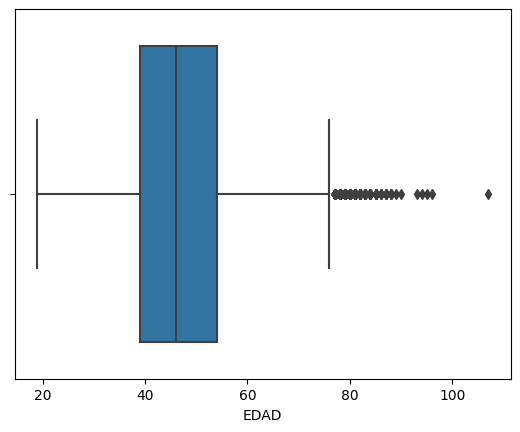

In [372]:
sns.boxplot(x="EDAD", data=data, orient="v")

**IMPUTACION**

In [ ]:
#mediana_edad = data['EDAD'].median()
# Imputar los valores faltantes con la mediana
#data['EDAD'] = data['EDAD'].fillna(mediana_edad)
#data['EDAD'] = data['EDAD'].fillna(23)

In [ ]:
#sns.boxplot(x="EDAD", data=data, orient="v")

In [ ]:
#datafinal = data.fillna(data.mode().iloc[0])

#data['NO_DEPARTAMENTO'] = data['NO_DEPARTAMENTO'].fillna("ANCASH") #ELEGIMOS ANCASH DEBIDO A QUE LA DISTRIBUCION DE LOS AHORRADORES ES SIMILAR
#data['NO_PROVINCIA'] = data['NO_PROVINCIA'].fillna("HUARAZ") #PARA NO PERDER CONSISTENCIA ELEGIREMOS UNA PROVINCIA DE ANCASH CON SIMILAR DISTRIBUCION DE LA VARIABLE TARGET QUE ES ESTE CASO SERIA HUARAZ

In [373]:
data.head()

,ID,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,...,Meses_sin_Saldos_Vencidos,Frecuencia_Transacciones,CO_TIPO_SEXO,EDAD,NO_DEPARTAMENTO,NO_PROVINCIA,DE_CIIU,AÑO,MES,TARGET
0,00000ae64b2d4ea7b318f3caa49fb832,1,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0,0,1,52,3,92,187,2007,11,NaN
1,00002e673be949b1afe485e71ff71048,1,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0,0,1,61,8,79,255,2006,1,0.0
2,0000e7adc30c476ba07265c60676562c,2,2,0,0.0,38978.653689,0.0,0.0,27035.078167,0.0,...,9,9,2,49,3,11,245,2006,11,NaN
3,00014b0427554bbbad91e0d8aeab3118,2,0,0,0.0,42683.458622,0.0,0.0,0.000000,0.0,...,9,9,1,43,4,75,245,2006,1,0.0
4,0001efa922ff405384514b5c6ed18294,1,1,0,0.0,0.000000,0.0,0.0,4329.417411,0.0,...,9,0,2,56,17,91,187,2014,9,0.0


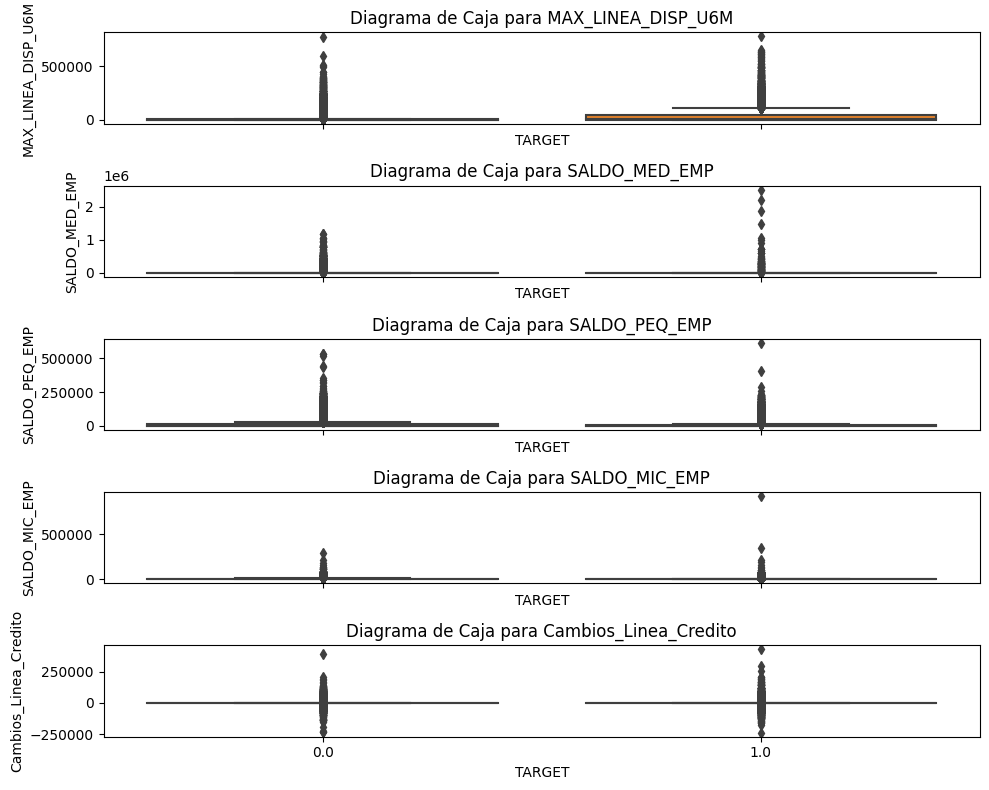

In [381]:
# Selecciona las variables que deseas incluir en los boxplots
variables_interes = ['MAX_LINEA_DISP_U6M', 'SALDO_MED_EMP', 'SALDO_PEQ_EMP', 'SALDO_MIC_EMP', 'Cambios_Linea_Credito']

# Configura el diseño de los subgráficos en una cuadrícula
fig, axes = plt.subplots(nrows=len(variables_interes), figsize=(10, 8), sharex=True)

# Itera sobre las variables y genera los boxplots
for i, var in enumerate(variables_interes):
    sns.boxplot(x='TARGET', y=var, data=data, ax=axes[i])
    axes[i].set_title(f'Diagrama de Caja para {var}')

# Ajusta el espacio entre subgráficos y evita superposiciones
plt.tight_layout()

# Muestra los boxplots
plt.show()

In [389]:
data['MAX_LINEA_DISP_U6M'].quantile(np.arange(0.9,1,0.01))

0.90    25300.000000
0.91    29321.037228
0.92    34029.572622
0.93    40019.443383
0.94    47402.571333
0.95    57238.206719
0.96    57246.149461
0.97    57246.149461
0.98    57246.149461
0.99    57246.149461
Name: MAX_LINEA_DISP_U6M, dtype: float64

In [388]:
data['MAX_LINEA_DISP_U6M'] = data.where(data['MAX_LINEA_DISP_U6M']<57246.149461, 57246.149461)["MAX_LINEA_DISP_U6M"]

In [385]:
data['SALDO_VENCIDO'].quantile(np.arange(0.9,1,0.01))

0.90      908.394811
0.91     1284.583495
0.92     1741.019111
0.93     2332.887673
0.94     3170.992603
0.95     4407.312947
0.96     6358.594358
0.97     9692.627945
0.98    15792.001703
0.99    30546.412581
Name: SALDO_VENCIDO, dtype: float64

In [390]:
data['SALDO_VENCIDO'] = data.where(data['SALDO_VENCIDO']<4407.312947, 4407.312947)["SALDO_VENCIDO"]

In [392]:
data['SALDO_CONS_REV'].quantile(np.arange(0.9,1,0.01))

0.90    3217.558789
0.91    3672.828038
0.92    4231.955890
0.93    4933.940466
0.94    5800.448674
0.95    6986.446007
0.96    6987.234294
0.97    6987.234294
0.98    6987.234294
0.99    6987.234294
Name: SALDO_CONS_REV, dtype: float64

In [391]:
data['SALDO_CONS_REV'] = data.where(data['SALDO_CONS_REV']<6987.234294, 6987.234294)["SALDO_CONS_REV"]

In [395]:
data['SALDO_MIC_EMP'].quantile(np.arange(0.9,1,0.01))

0.90     9390.555540
0.91    10142.944695
0.92    10914.114204
0.93    11869.642971
0.94    12954.821688
0.95    14226.584681
0.96    14226.612525
0.97    14226.612525
0.98    14226.612525
0.99    14226.612525
Name: SALDO_MIC_EMP, dtype: float64

In [394]:
data['SALDO_MIC_EMP'] = data.where(data['SALDO_MIC_EMP']<14226.612525, 14226.612525)["SALDO_MIC_EMP"]

In [397]:
data['SALDO_PEQ_EMP'].quantile(np.arange(0.9,1,0.01))

0.90     46320.924009
0.91     50429.482075
0.92     55003.153065
0.93     60403.665185
0.94     66521.204929
0.95     73854.445816
0.96     82659.175868
0.97     93294.477481
0.98    107274.100168
0.99    135693.795494
Name: SALDO_PEQ_EMP, dtype: float64

In [398]:
data['SALDO_PEQ_EMP'] = data.where(data['SALDO_PEQ_EMP']<73854.445816, 73854.445816)["SALDO_MIC_EMP"]

In [400]:
data['Cambios_Linea_Credito'].quantile(np.arange(0.9,1,0.01))

0.90     1650.00000
0.91     2200.00000
0.92     3035.02540
0.93     3850.00000
0.94     5213.52238
0.95     6987.53055
0.96     9680.00000
0.97    13310.47850
0.98    20139.13616
0.99    35003.29624
Name: Cambios_Linea_Credito, dtype: float64

In [401]:
data['Cambios_Linea_Credito'] = data.where(data['Cambios_Linea_Credito']<6987.53055, 6987.53055)["Cambios_Linea_Credito"]

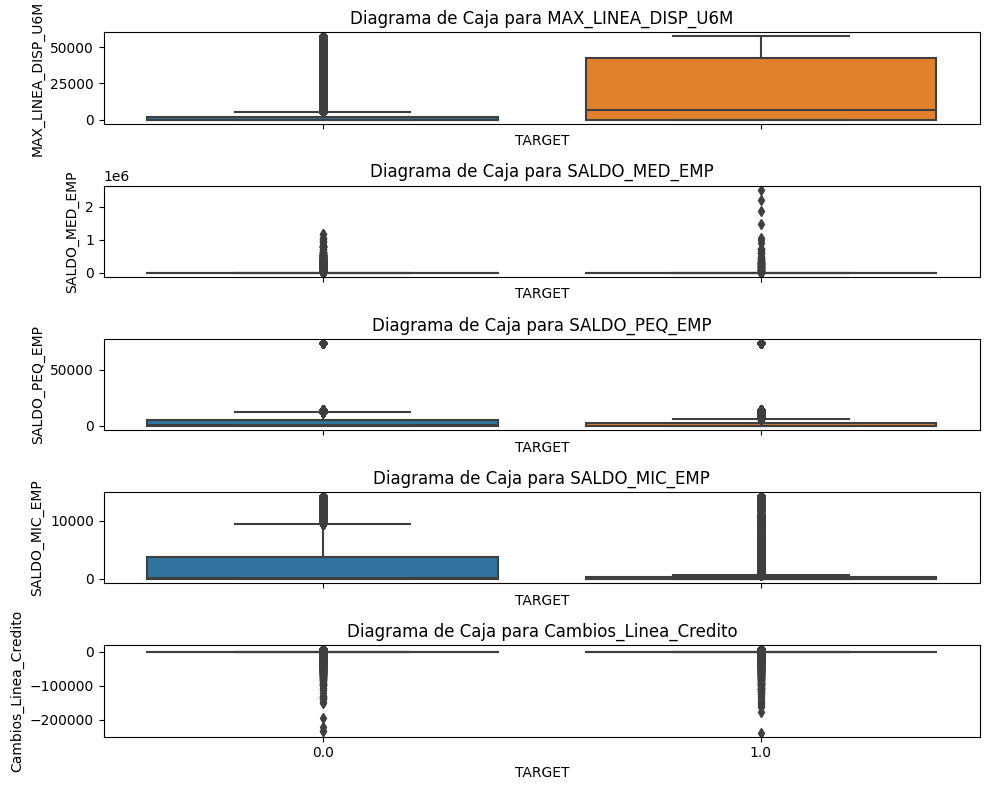

In [402]:
# Selecciona las variables que deseas incluir en los boxplots
variables_interes = ['MAX_LINEA_DISP_U6M', 'SALDO_MED_EMP', 'SALDO_PEQ_EMP', 'SALDO_MIC_EMP', 'Cambios_Linea_Credito']

# Configura el diseño de los subgráficos en una cuadrícula
fig, axes = plt.subplots(nrows=len(variables_interes), figsize=(10, 8), sharex=True)

# Itera sobre las variables y genera los boxplots
for i, var in enumerate(variables_interes):
    sns.boxplot(x='TARGET', y=var, data=data, ax=axes[i])
    axes[i].set_title(f'Diagrama de Caja para {var}')

# Ajusta el espacio entre subgráficos y evita superposiciones
plt.tight_layout()

# Muestra los boxplots
plt.show()

In [403]:
data = data.drop('TARGET', axis=1)
datafinal = pd.merge(df_train, data, on='ID', how='inner')
datafinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91183 entries, 0 to 91182
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               91183 non-null  object 
 1   TARGET                           91183 non-null  int64  
 2   CANT_EMP_NEG                     91183 non-null  float64
 3   CANT_EMP_CONS                    91183 non-null  float64
 4   CANT_EMP_HIPOT                   91183 non-null  float64
 5   SALDO_MED_EMP                    91183 non-null  float64
 6   SALDO_PEQ_EMP                    91183 non-null  float64
 7   SALDO_MIC_EMP                    91183 non-null  float64
 8   SALDO_CONS_REV                   91183 non-null  float64
 9   SALDO_CONS_NO_REV                91183 non-null  float64
 10  SALDO_HIPOT                      91183 non-null  float64
 11  SALDO_VENCIDO                    91183 non-null  float64
 12  CANT_EMP_DOL_CONS 

In [377]:
def calculate_woe_iv(dataset, feature_cat, target):
    lst = []
    feature=feature_cat
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return iv, dset

In [376]:
def getFeactureIV_Importance(df,feactures,target):
    feactureIV_Importance=list()
    #feacture,target
    for v in feactures:
      iv, rep=calculate_woe_iv(df,v,target)
      feactureIV_Importance.append(iv)
    #pd.DataFrame({"Feacture":feactures,"IV":feactureIV_Importance}).sort_values("IV")
    display(pd.DataFrame({"Feacture":feactures,"IV":feactureIV_Importance}).sort_values("IV"))

In [378]:
datafinal.columns

Index(['ID', 'TARGET', 'CANT_EMP_NEG', 'CANT_EMP_CONS', 'CANT_EMP_HIPOT',
       'SALDO_MED_EMP', 'SALDO_PEQ_EMP', 'SALDO_MIC_EMP', 'SALDO_CONS_REV',
       'SALDO_CONS_NO_REV', 'SALDO_HIPOT', 'SALDO_VENCIDO',
       'CANT_EMP_DOL_CONS', 'SALDO_DOLA_CONS', 'MAX_LINEA_DISP_U6M',
       'Saldo_Total', 'Variacion_SALDO_MED_EMP', 'Variacion_SALDO_PEQ_EMP',
       'Variacion_SALDO_MIC_EMP', 'Variacion_Consumo_Revolvente',
       'Variacion_Consumo_NO_Revolvente', 'Cambios_Linea_Credito',
       'Meses_sin_Saldos_Vencidos', 'Frecuencia_Transacciones', 'CO_TIPO_SEXO',
       'EDAD', 'NO_DEPARTAMENTO', 'NO_PROVINCIA', 'DE_CIIU', 'AÑO', 'MES'],
      dtype='object')

In [ ]:
IV_v, ReporteWoe_v=calculate_woe_iv(datafinal, "AÑO", "TARGET")
IV_v

In [ ]:
IV_v, ReporteWoe_v=calculate_woe_iv(datafinal, "NO_DEPARTAMENTO", "TARGET")
IV_v

In [ ]:
IV_v, ReporteWoe_v=calculate_woe_iv(datafinal, "NO_PROVINCIA", "TARGET")
IV_v

In [ ]:
IV_v, ReporteWoe_v=calculate_woe_iv(datafinal, "DE_CIIU", "TARGET")
IV_v

In [ ]:
IV_v, ReporteWoe_v=calculate_woe_iv(datafinal, "CANT_EMP_NEG", "TARGET")
IV_v

In [ ]:
IV_v, ReporteWoe_v=calculate_woe_iv(datafinal, "CANT_EMP_CONS", "TARGET")
IV_v

In [ ]:
IV_v, ReporteWoe_v=calculate_woe_iv(datafinal, "CANT_EMP_HIPOT", "TARGET")
IV_v

In [ ]:
IV_v, ReporteWoe_v=calculate_woe_iv(datafinal, "CANT_EMP_DOL_NEG", "TARGET")
IV_v

In [ ]:
IV_v, ReporteWoe_v=calculate_woe_iv(datafinal, "CANT_EMP_DOL_CONS", "TARGET")
IV_v

In [ ]:
IV_v, ReporteWoe_v=calculate_woe_iv(datafinal, "CANT_EMP_DOL_HIPOT", "TARGET")
IV_v

In [ ]:
#SEGUN EL IV NO DEBEMOS CONSIDERAR EN EL MODELO CANT_EMP_DOL_HIPOT Y CANT_EMP_DOL_NEG

In [404]:
# Crear una copia del conjunto de datos original
df_respaldo = datafinal.copy()


In [493]:
datafinal = df_respaldo.copy()

In [494]:
datafinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91183 entries, 0 to 91182
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               91183 non-null  object 
 1   TARGET                           91183 non-null  int64  
 2   CANT_EMP_NEG                     91183 non-null  float64
 3   CANT_EMP_CONS                    91183 non-null  float64
 4   CANT_EMP_HIPOT                   91183 non-null  float64
 5   SALDO_MED_EMP                    91183 non-null  float64
 6   SALDO_PEQ_EMP                    91183 non-null  float64
 7   SALDO_MIC_EMP                    91183 non-null  float64
 8   SALDO_CONS_REV                   91183 non-null  float64
 9   SALDO_CONS_NO_REV                91183 non-null  float64
 10  SALDO_HIPOT                      91183 non-null  float64
 11  SALDO_VENCIDO                    91183 non-null  float64
 12  CANT_EMP_DOL_CONS 

## **PRUEBA**
---

In [495]:
# Crear una copia del conjunto de datos original
df_copia = datafinal.copy()

# Lista de variables a eliminar
variables_a_eliminar = [ 'NO_DEPARTAMENTO', 'Cambios_Linea_Credito','Variacion_SALDO_MED_EMP','SALDO_DOLA_CONS','CANT_EMP_DOL_CONS','SALDO_CONS_NO_REV']
# Eliminar las variables seleccionadas
datafinal = df_copia.drop(variables_a_eliminar, axis=1)

In [496]:
datafinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91183 entries, 0 to 91182
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               91183 non-null  object 
 1   TARGET                           91183 non-null  int64  
 2   CANT_EMP_NEG                     91183 non-null  float64
 3   CANT_EMP_CONS                    91183 non-null  float64
 4   CANT_EMP_HIPOT                   91183 non-null  float64
 5   SALDO_MED_EMP                    91183 non-null  float64
 6   SALDO_PEQ_EMP                    91183 non-null  float64
 7   SALDO_MIC_EMP                    91183 non-null  float64
 8   SALDO_CONS_REV                   91183 non-null  float64
 9   SALDO_HIPOT                      91183 non-null  float64
 10  SALDO_VENCIDO                    91183 non-null  float64
 11  MAX_LINEA_DISP_U6M               91183 non-null  float64
 12  Saldo_Total       

## **BALANCEO DE LAS CLASES DE VARIABLE A PREDECIR TARGET**
---

In [497]:
count_class_0, count_class_1 = datafinal.TARGET.value_counts()

# Divide by class
df_class_0 = datafinal[datafinal['TARGET'] == 0]
df_class_1 = datafinal[datafinal['TARGET'] == 1]

In [498]:
count_class_0, len(df_class_0), count_class_1, len(df_class_1)

(77505, 77505, 13678, 13678)

In [499]:
datafinal['TARGET'].value_counts(0)

0    77505
1    13678
Name: TARGET, dtype: int64

Random over-sampling:
0    77505
1    77505
Name: TARGET, dtype: int64


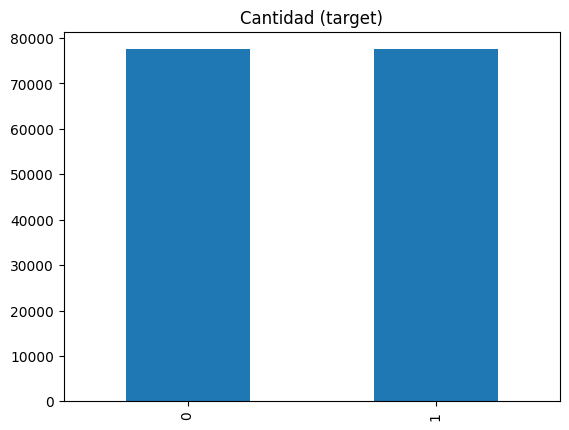

In [500]:
np.random.seed(721)
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over.TARGET.value_counts())

df_over.TARGET.value_counts().plot(kind='bar', title='Cantidad (target)');

### **PARA TEST**
---

In [501]:
# Realizar un join basado en la columna 'ID'
data_testf = pd.merge(df_test, data, on='ID', how='inner')


In [502]:
# Lista de variables a eliminar
variables_a_eliminar = [ 'NO_DEPARTAMENTO', 'Cambios_Linea_Credito','Variacion_SALDO_MED_EMP','SALDO_DOLA_CONS','CANT_EMP_DOL_CONS','SALDO_CONS_NO_REV']

# Eliminar las variables seleccionadas
data_testf = data_testf.drop(variables_a_eliminar, axis=1)

In [503]:
data_testf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60789 entries, 0 to 60788
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               60789 non-null  object 
 1   TARGET                           0 non-null      float64
 2   CANT_EMP_NEG                     60789 non-null  float64
 3   CANT_EMP_CONS                    60789 non-null  float64
 4   CANT_EMP_HIPOT                   60789 non-null  float64
 5   SALDO_MED_EMP                    60789 non-null  float64
 6   SALDO_PEQ_EMP                    60789 non-null  float64
 7   SALDO_MIC_EMP                    60789 non-null  float64
 8   SALDO_CONS_REV                   60789 non-null  float64
 9   SALDO_HIPOT                      60789 non-null  float64
 10  SALDO_VENCIDO                    60789 non-null  float64
 11  MAX_LINEA_DISP_U6M               60789 non-null  float64
 12  Saldo_Total       

In [504]:
#probabilities = [0.5, 0.5]  # Probabilidades de obtener 1 o 0

#data_testf['TARGET'] = np.random.choice([1, 0], size=len(data_testf), p=probabilities)

In [505]:
MB = "/content/drive/MyDrive/DATATHON MI BANCO/Y_FINAL.csv"  #SUBIMOS NUESTROS RESULTADOS DEL PRIMER INTENTO PARA TENER UNA NOCION DE LAS CLASFICACIONES POSTERIORES
y_testMB = pd.read_csv(MB)

In [506]:
y_testMB = y_testMB['Predictions']

In [507]:
label_upsample_test = data_testf["TARGET"]
IDTEST = data_testf["ID"]
data_testf.drop("TARGET",inplace = True, axis = 1) #Eliminamos la variable Traget para realizar el Train y Test
data_testf.drop("ID",inplace = True, axis = 1)

In [ ]:
#PRUEBA VARIABLES MENOS IMPORTANTES
#data_testf.drop("CANT_EMP_DOL_HIPOT",inplace = True, axis = 1)
#data_testf.drop("SALDO_DOLA_NEG",inplace = True, axis = 1)
#data_testf.drop("SALDO_DOLA_HIPOT",inplace = True, axis = 1)
#data_testf.drop("CANT_EMP_DOL_NEG",inplace = True, axis = 1)


In [508]:
X_testMB = data_testf

In [509]:
X_testMB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60789 entries, 0 to 60788
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CANT_EMP_NEG                     60789 non-null  float64
 1   CANT_EMP_CONS                    60789 non-null  float64
 2   CANT_EMP_HIPOT                   60789 non-null  float64
 3   SALDO_MED_EMP                    60789 non-null  float64
 4   SALDO_PEQ_EMP                    60789 non-null  float64
 5   SALDO_MIC_EMP                    60789 non-null  float64
 6   SALDO_CONS_REV                   60789 non-null  float64
 7   SALDO_HIPOT                      60789 non-null  float64
 8   SALDO_VENCIDO                    60789 non-null  float64
 9   MAX_LINEA_DISP_U6M               60789 non-null  float64
 10  Saldo_Total                      60789 non-null  float64
 11  Variacion_SALDO_PEQ_EMP          60789 non-null  float64
 12  Variacion_SALDO_MI

In [510]:
X_testMB.shape

(60789, 23)

In [511]:
y_testMB.shape

(60789,)

**PARA TRAIN**

In [512]:
label_upsample = df_over["TARGET"]
IDTRAIN = df_over["ID"]
df_over.drop("TARGET",inplace = True, axis = 1) #Eliminamos la variable Traget para realizar el Train y Test
df_over.drop("ID",inplace = True, axis = 1)



In [ ]:
#PRUEBA VARIABLES MENOS IMPORTANTES
#df_over.drop("CANT_EMP_DOL_HIPOT",inplace = True, axis = 1)
#df_over.drop("SALDO_DOLA_NEG",inplace = True, axis = 1)
#df_over.drop("SALDO_DOLA_HIPOT",inplace = True, axis = 1)
#df_over.drop("CANT_EMP_DOL_NEG",inplace = True, axis = 1)

In [513]:
df_over.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155010 entries, 1 to 39986
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   CANT_EMP_NEG                     155010 non-null  float64
 1   CANT_EMP_CONS                    155010 non-null  float64
 2   CANT_EMP_HIPOT                   155010 non-null  float64
 3   SALDO_MED_EMP                    155010 non-null  float64
 4   SALDO_PEQ_EMP                    155010 non-null  float64
 5   SALDO_MIC_EMP                    155010 non-null  float64
 6   SALDO_CONS_REV                   155010 non-null  float64
 7   SALDO_HIPOT                      155010 non-null  float64
 8   SALDO_VENCIDO                    155010 non-null  float64
 9   MAX_LINEA_DISP_U6M               155010 non-null  float64
 10  Saldo_Total                      155010 non-null  float64
 11  Variacion_SALDO_PEQ_EMP          155010 non-null  float64
 12  Var

In [514]:
# REALIZAMOS LA PARTICION DE LA DATA EN TRAIN Y TEST
from sklearn.model_selection import train_test_split
seed = 721
X_train_o, X_test, y_train_o, y_test = train_test_split(df_over, label_upsample, test_size = 0.3)

In [515]:
X_train_o.shape

(108507, 23)

In [516]:
X_test.shape

(46503, 23)

In [517]:
y_train_o.shape

(108507,)

In [518]:
y_test.shape

(46503,)

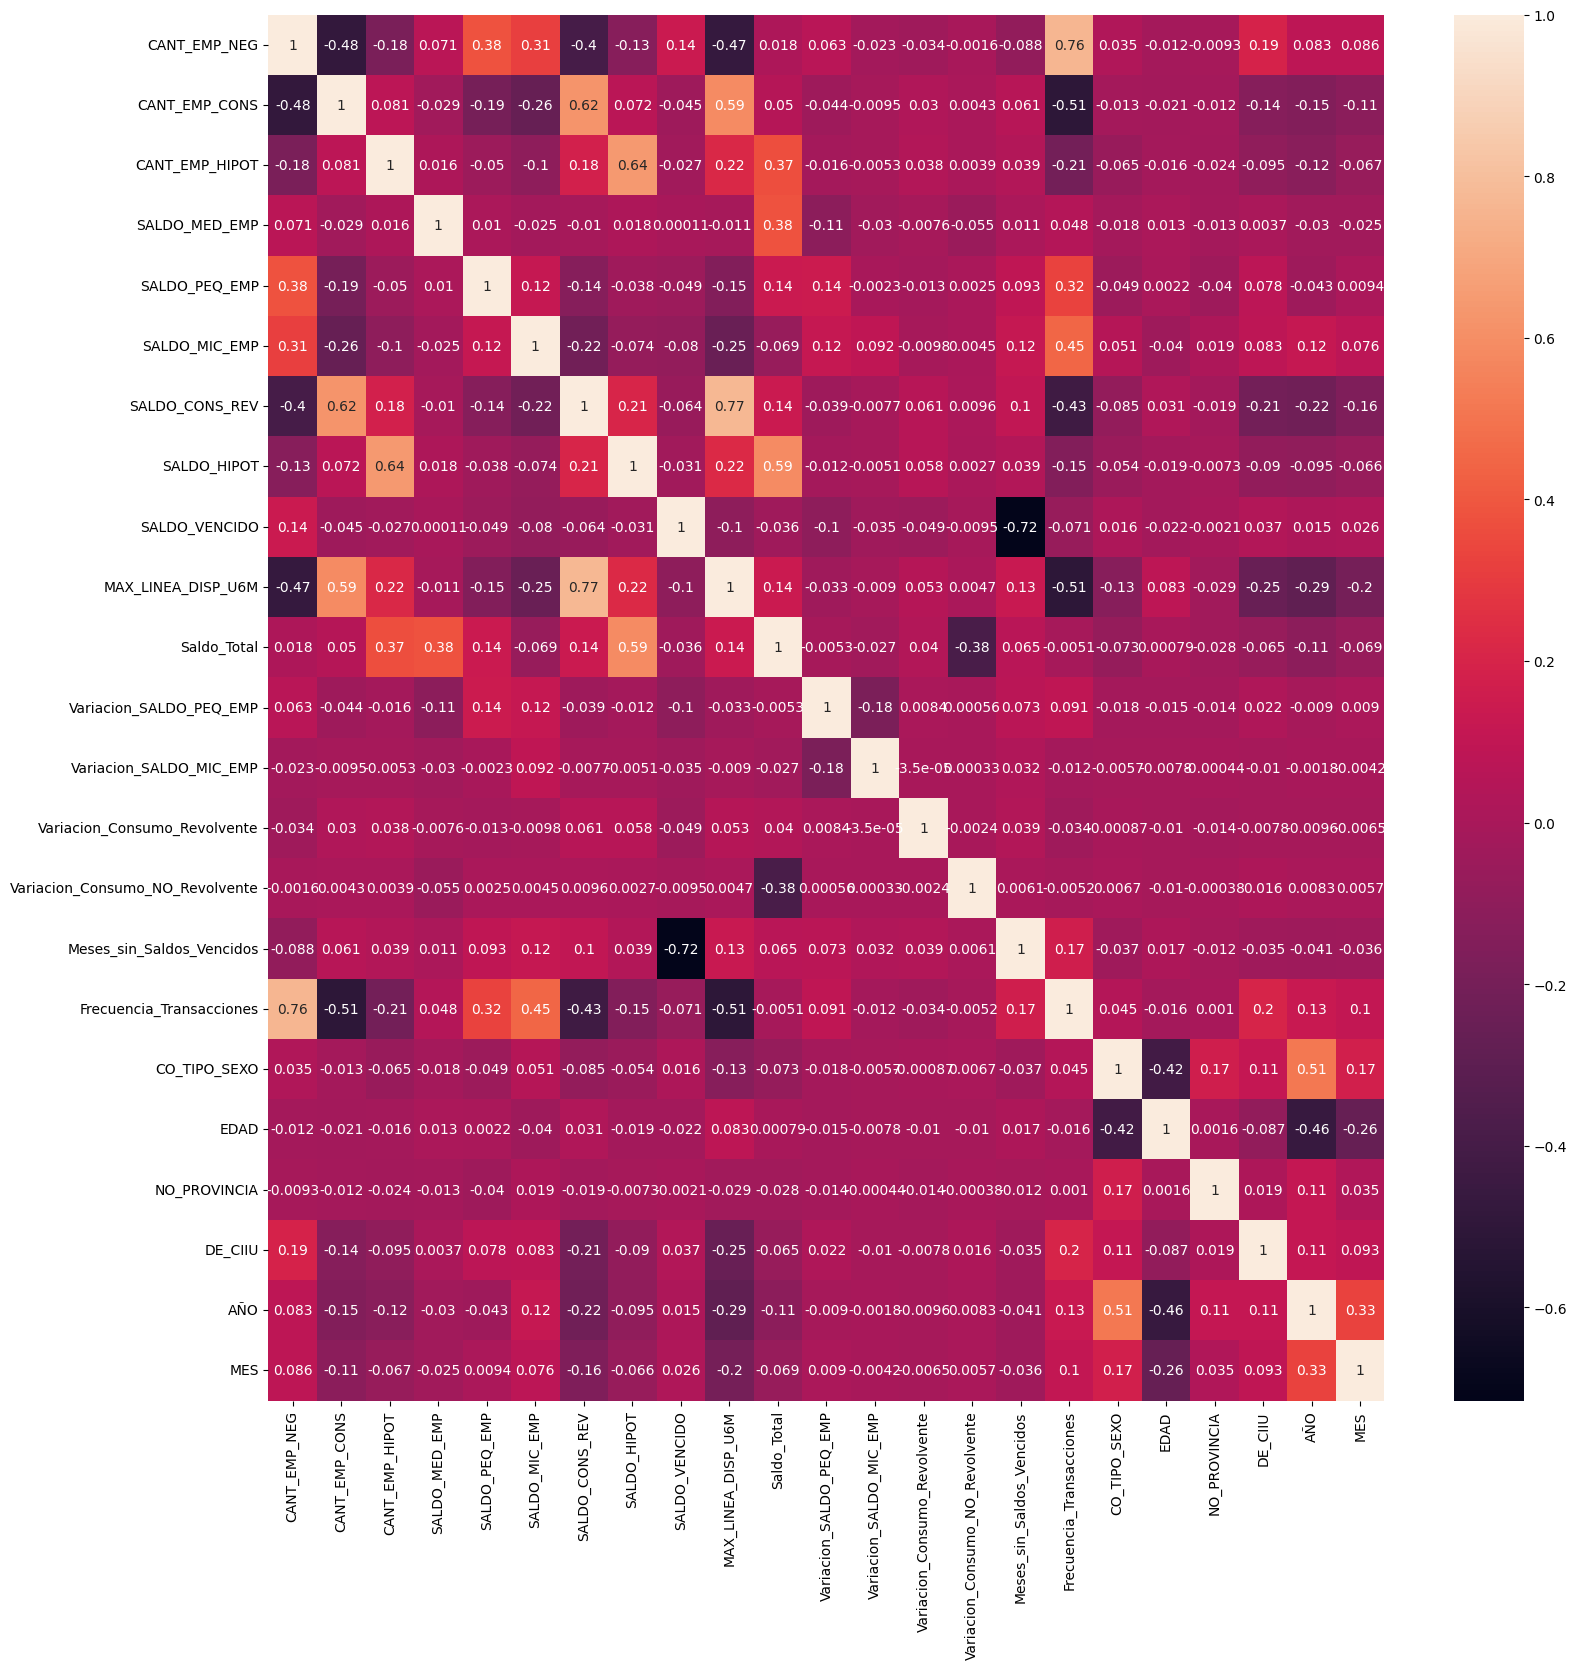

In [519]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X_train_o.corr(), annot=True, ax=ax)

plt.show()

# **MODELAMIENTO**
---

In [432]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve


In [520]:
def apply_classifier(clf,xTrain,xTest,yTrain,yTest):

    clf.fit(xTrain, yTrain) #Entrenamiento del modelo
    predictions = clf.predict(xTest) #Validación sobre la data de testing
    conf_mtx = confusion_matrix(yTest,predictions) #Matriz de confusión de la data de testing real con la predicha

    f, axes = plt.subplots(ncols=2, figsize=(15, 5)) #Definición del área de visualización (2 gráficas)

    sns.heatmap(conf_mtx,annot=True,cbar = False,fmt = "g",ax = axes[0])#definición del formato de la matriz de confusión
    axes[0].set_xlabel('Predicted labels') #Titulo del eje x de la matriz de confusión
    axes[0].set_ylabel('True labels') #Titulo del eje y de la matriz de confusión
    axes[0].set_title('Confusion Matrix Test'); #Titulo de la matriz de confusión
    axes[0].xaxis.set_ticklabels(['NO AHORRADOR', 'AHORRADOR']); #distribución de los resultados en la matriz de confusión del eje x
    axes[0].yaxis.set_ticklabels(['NO AHORRADOR', 'AHORRADOR']); #distribución de los resultados en la matriz de confusión del eje y

    print(classification_report(yTest,predictions)) #mostrar resultados

    roc_auc = roc_auc_score(yTest,predictions) #definición del cálculo del auc
    print ("AUC ROC : ",roc_auc) #mostrar el resultado

    fpr, tpr,_ = roc_curve(yTest, predictions) #Función para armar la curva ROC
    #fpr : false positive rate
    #tpr : true positive rate
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc)); #código para mostrar el resultado del auc en la gráfica
    axes[1].plot([0, 1], [0, 1]) #código del formato de la gráfica
    plt.xlabel('False Positive Rate') #título del eje x
    plt.ylabel('True Positive Rate') #título del eje y
    plt.title('ROC') #título del gráfico
    return predictions


## **IMPORATNCIA DE LAS VARIABLES**
---

                            Feature  Importance
9                MAX_LINEA_DISP_U6M    0.107191
10                      Saldo_Total    0.099714
18                             EDAD    0.073917
21                              AÑO    0.056389
20                          DE_CIIU    0.055917
11          Variacion_SALDO_PEQ_EMP    0.055776
14  Variacion_Consumo_NO_Revolvente    0.050899
12          Variacion_SALDO_MIC_EMP    0.050652
6                    SALDO_CONS_REV    0.049384
22                              MES    0.048253
19                     NO_PROVINCIA    0.046140
5                     SALDO_MIC_EMP    0.041569
8                     SALDO_VENCIDO    0.041039
4                     SALDO_PEQ_EMP    0.038925
0                      CANT_EMP_NEG    0.038865
13     Variacion_Consumo_Revolvente    0.032817
16         Frecuencia_Transacciones    0.029640
15        Meses_sin_Saldos_Vencidos    0.026781
1                     CANT_EMP_CONS    0.022922
17                     CO_TIPO_SEXO    0

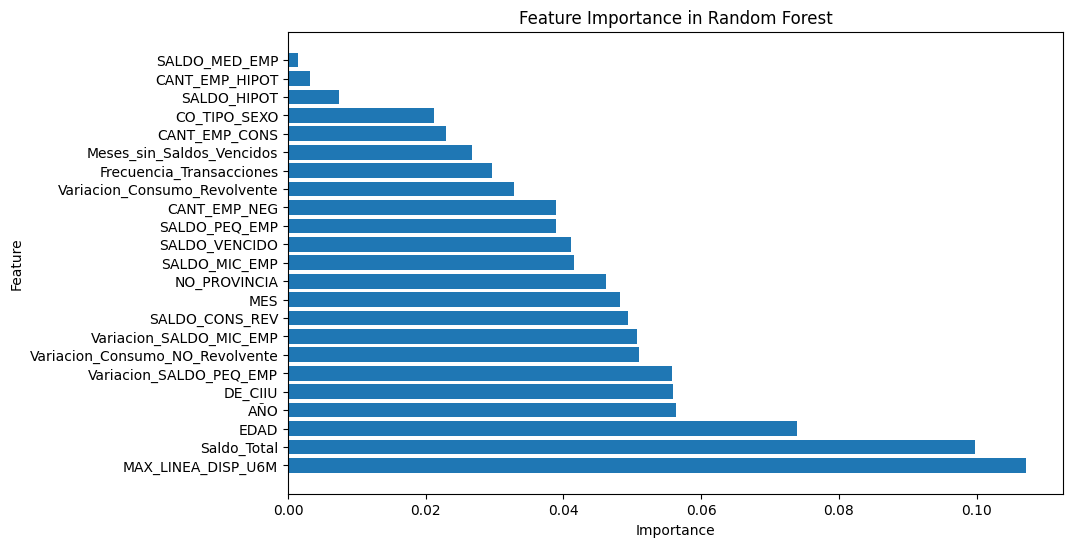

In [521]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que X_train y y_train son tus datos de entrenamiento
# y que ya tienes tus datos preprocesados y divididos.

# Inicializar el clasificador de Random Forest
random_forest = RandomForestClassifier(random_state=721)

# Ajustar el modelo a tus datos
random_forest.fit(X_train_o, y_train_o)

# Obtener la importancia de las características
feature_importances = random_forest.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': X_train_o.columns, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame o graficar la importancia de las características
print(feature_importance_df)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

## **RANDOM FOREST ENTRENADO CON LA DATA TRAIN Y PROBADO CON EL TEST DEL TRAIN**
---------------------------------------------------

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     23338
           1       0.94      0.99      0.97     23165

    accuracy                           0.97     46503
   macro avg       0.97      0.97      0.97     46503
weighted avg       0.97      0.97      0.97     46503

AUC ROC :  0.9652782400258871


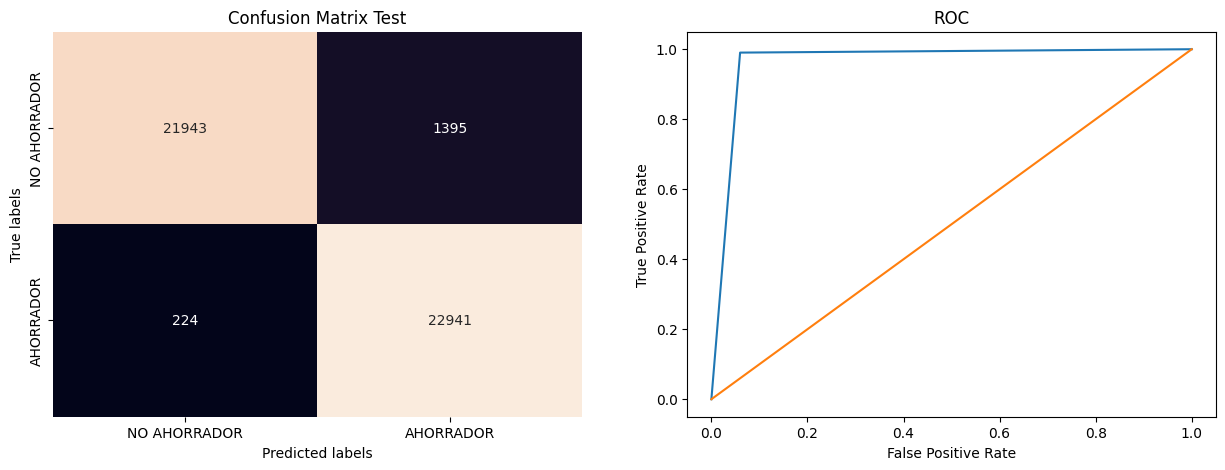

In [522]:
random_forest = RandomForestClassifier(random_state = 721)
Y = apply_classifier(random_forest,X_train_o, X_test, y_train_o, y_test)

## **XGBOOST ENTRENADO CON LA DATA TRAIN Y PROBADO CON EL TEST DEL TRAIN**
---------------------------------------------------

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     23161
           1       0.91      0.96      0.94     23342

    accuracy                           0.94     46503
   macro avg       0.94      0.94      0.94     46503
weighted avg       0.94      0.94      0.94     46503

AUC ROC :  0.9354314662376236


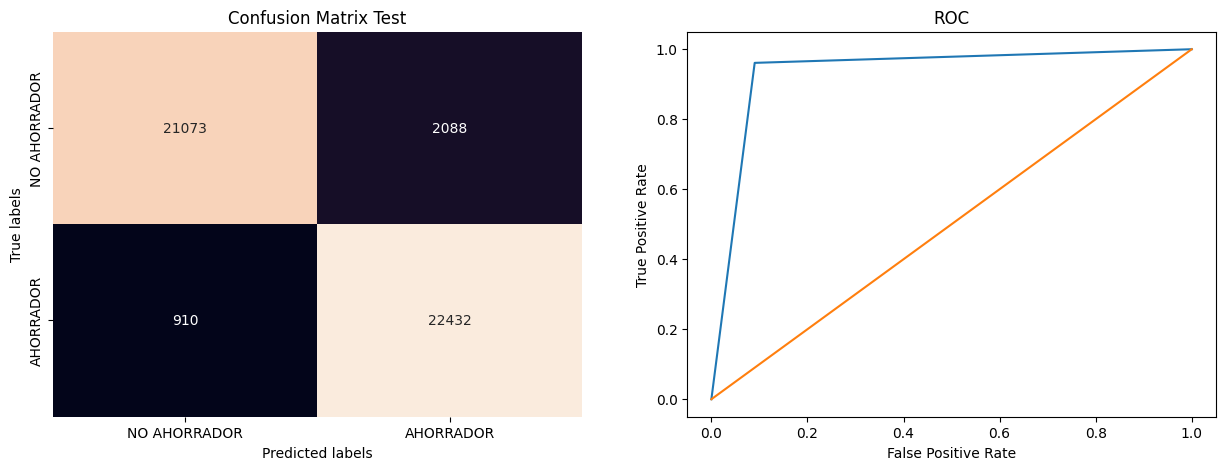

In [ ]:
xg_boost = XGBClassifier(
    random_state=721,
    learning_rate=0.05,
    n_estimators=200,
    max_depth=20,
    min_child_weight=1,
    subsample=1.0,
    colsample_bytree=1.0,
    gamma=0,
)
Y = apply_classifier(xg_boost,X_train_o, X_test, y_train_o, y_test)

## **ADABOOST ENTRENADO CON LA DATA TRAIN Y PROBADO CON EL TEST DEL TRAIN**
---------------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      0.96      0.97     23161
           1       0.96      0.98      0.97     23342

    accuracy                           0.97     46503
   macro avg       0.97      0.97      0.97     46503
weighted avg       0.97      0.97      0.97     46503

AUC ROC :  0.9710446332298098


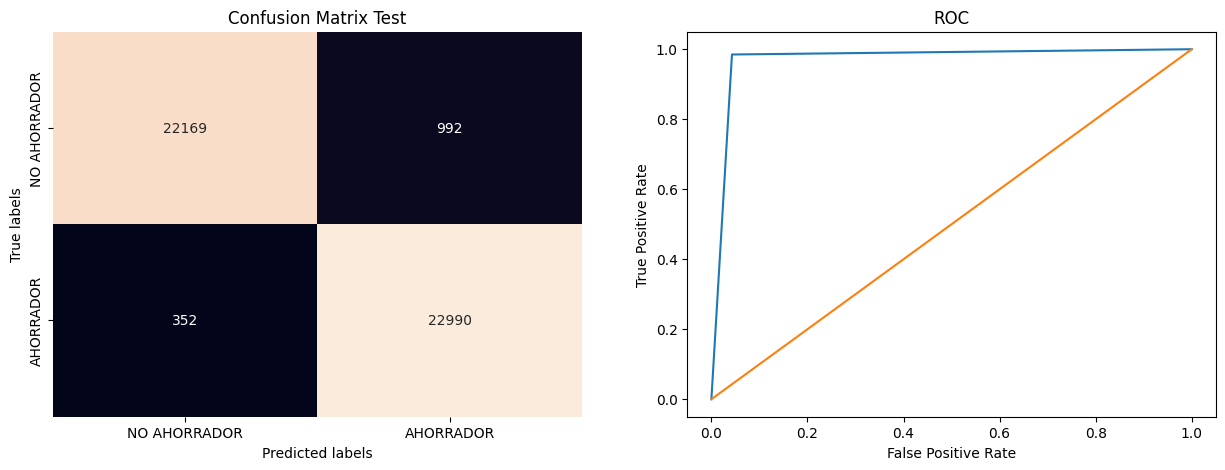

In [ ]:
base_classifier = DecisionTreeClassifier(max_depth=20)
boost_clf = AdaBoostClassifier(
    base_estimator=base_classifier,
    n_estimators=200,
    learning_rate=0.05,  # Puedes ajustar este valor según tus necesidades
    random_state=721
)

Y = apply_classifier(boost_clf,X_train_o, X_test, y_train_o, y_test)

## **RANDOM FOREST ENTRENADO CON LA DATA TRAIN Y PROBADO EN EL TEST KAGGLE**
---------------------------------------------------

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     52811
           1       0.75      0.76      0.76      7978

    accuracy                           0.94     60789
   macro avg       0.86      0.86      0.86     60789
weighted avg       0.94      0.94      0.94     60789

AUC ROC :  0.860357606849561


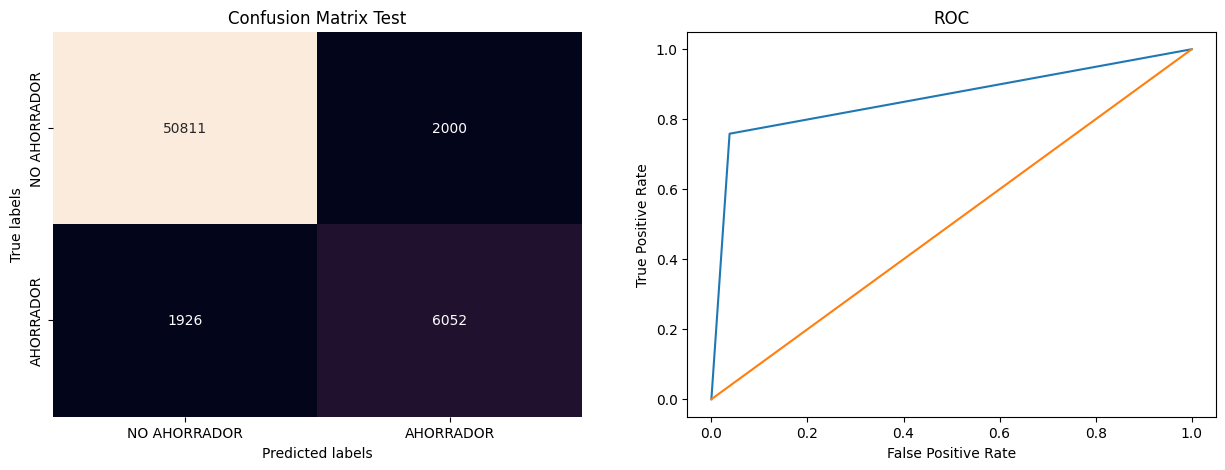

In [523]:
random_forest = RandomForestClassifier(random_state = 721,
    n_estimators=300,
    max_depth = 25,
    criterion = "entropy",
    min_samples_split=5,
    class_weight ="balanced")
Y = apply_classifier(random_forest,X_train_o, X_testMB, y_train_o, y_testMB)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     52811
           1       0.77      0.74      0.75      7978

    accuracy                           0.94     60789
   macro avg       0.87      0.85      0.86     60789
weighted avg       0.94      0.94      0.94     60789

AUC ROC :  0.8529913884435345


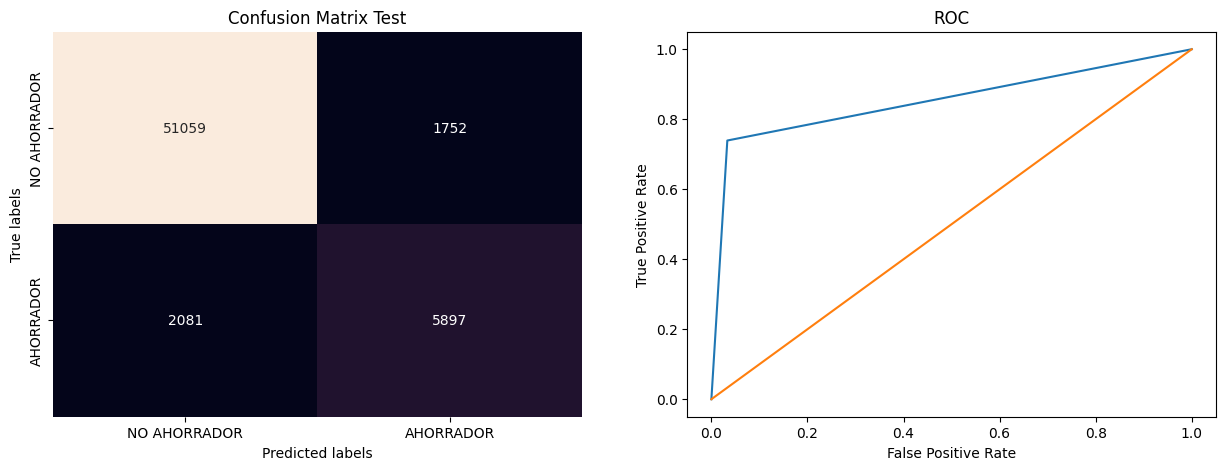

In [534]:
random_forest = RandomForestClassifier(random_state = 721,
    n_estimators=300,
    max_depth = 25,
    criterion = "gini",
    min_samples_split=5,
    class_weight ="balanced")
Y = apply_classifier(random_forest,X_train_o, X_testMB, y_train_o, y_testMB)

## **XGBOOST ENTRENADO CON LA DATA TRAIN Y PROBADO EN EL TEST KAGGLE**
---------------------------------------------------

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     54323
           1       0.66      0.79      0.72      6466

    accuracy                           0.93     60789
   macro avg       0.82      0.87      0.84     60789
weighted avg       0.94      0.93      0.94     60789

AUC ROC :  0.8713216541269037


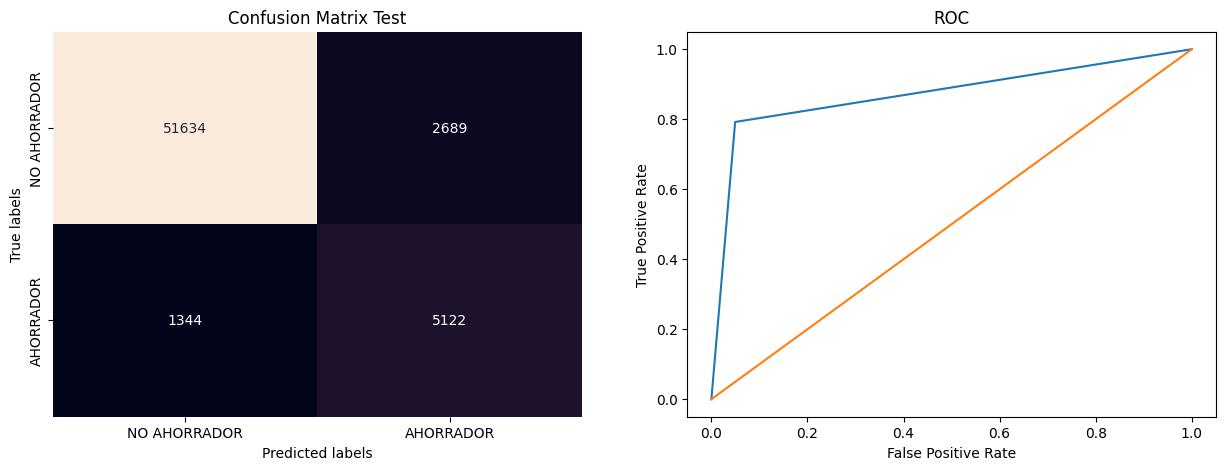

In [ ]:
xg_boost = XGBClassifier(
    random_state=721,
    learning_rate=0.05,
    n_estimators=300,
    max_depth=20,
    min_child_weight=1,
    subsample=1.0,
    colsample_bytree=1.0,
    gamma=0,
)
Y = apply_classifier(xg_boost,X_train_o, X_testMB, y_train_o, y_testMB)

## **ADABOOST ENTRENADO CON LA DATA TRAIN Y PROBADO EN EL TEST KAGGLE**
---------------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.93      0.94      0.93     52811
           1       0.56      0.54      0.55      7978

    accuracy                           0.88     60789
   macro avg       0.75      0.74      0.74     60789
weighted avg       0.88      0.88      0.88     60789

AUC ROC :  0.7392900917393312


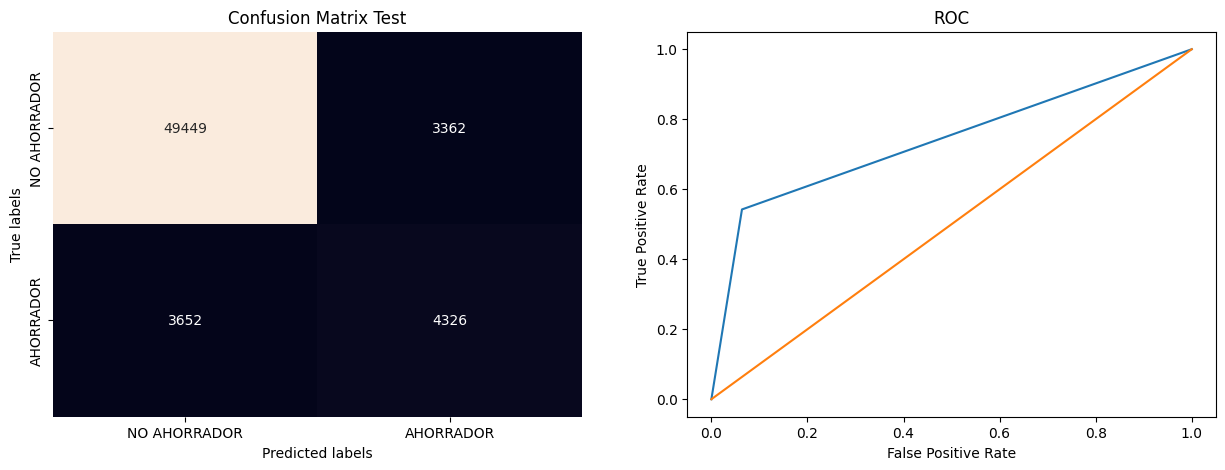

In [483]:
base_classifier = DecisionTreeClassifier(max_depth=25)
boost_clf = AdaBoostClassifier(
    base_estimator=base_classifier,
    n_estimators=200,
    learning_rate=0.1,  # Puedes ajustar este valor según tus necesidades
    random_state=721
)
Y = apply_classifier(boost_clf,X_train_o, X_testMB, y_train_o, y_testMB)

## **STACKING PARA MEJORAR LA PREDICCIONES**
-------------------------------------

## **STACKING CON RANDOM FOREST, ADABOOST Y XGBOOST**
---

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
xg_boost = XGBClassifier(
    random_state=721,
    learning_rate=0.05,
    n_estimators=200,
    max_depth=20,
    min_child_weight=1,
    subsample=1.0,
    colsample_bytree=1.0,
    gamma=0,
)

base_classifier = DecisionTreeClassifier(max_depth=20)
boost_clf = AdaBoostClassifier(
    base_estimator=base_classifier,
    n_estimators=200,
    learning_rate=0.05,  # Puedes ajustar este valor según tus necesidades
    random_state=721
)

random_forest = RandomForestClassifier(random_state=721)

In [ ]:
stacked_model = StackingClassifier(
    estimators=[('xgb', xg_boost),('ada', boost_clf),('rf', random_forest)],
    final_estimator=AdaBoostClassifier(random_state=721),  # Puedes elegir otro modelo como clasificador final
    stack_method='auto',  # Puedes ajustar según tus preferencias
    cv=5  # Número de divisiones para la validación cruzada interna
)

# Entrena el modelo de stacking
stacked_model.fit(X_train_o, y_train_o)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

StackingClassifier(cv=5,
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=1.0, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=0,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning...
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=721, ...)),
                               ('ada',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20),
                                                   learning_rate=0.05,
                                                   n_estimators=200,
                                                   random_state=721)),
                               ('rf',
                                RandomForestClassifier(random_state=721))],
                   final_estimator=AdaBoostClassifier(random_state=721))

In [ ]:
# Realiza predicciones en el conjunto de prueba
y_pred_stacked = stacked_model.predict(X_testMB)

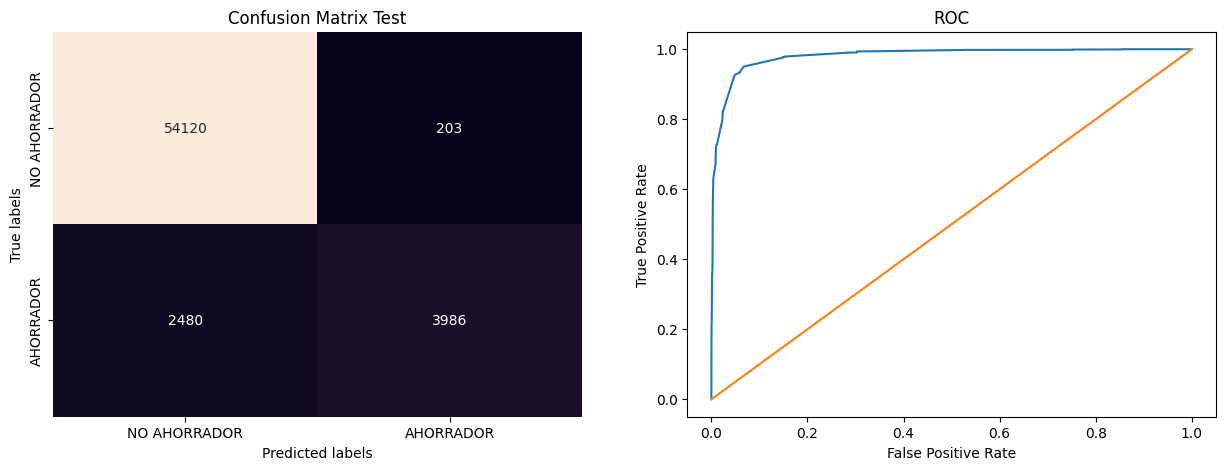

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     54323
           1       0.95      0.62      0.75      6466

    accuracy                           0.96     60789
   macro avg       0.95      0.81      0.86     60789
weighted avg       0.96      0.96      0.95     60789



In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Obtén las predicciones de probabilidad en lugar de las etiquetas
y_pred_proba_stacked = stacked_model.predict_proba(X_testMB)[:, 1]

# Ajusta un umbral para convertir las probabilidades en etiquetas binarias
threshold = 0.4900000000000003  # Puedes ajustar este umbral según tus necesidades
y_pred_binary = (y_pred_proba_stacked > threshold).astype(int)

# Matriz de confusión
conf_mtx_stacked = confusion_matrix(y_testMB, y_pred_binary)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_testMB, y_pred_proba_stacked)
roc_auc = roc_auc_score(y_testMB, y_pred_proba_stacked)

# Reporte de clasificación
classification_rep = classification_report(y_testMB, y_pred_binary)

# Gráficas
f, axes = plt.subplots(ncols=2, figsize=(15, 5))

# Matriz de confusión
sns.heatmap(conf_mtx_stacked, annot=True, cbar=False, fmt="g", ax=axes[0])
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')
axes[0].set_title('Confusion Matrix Test')
axes[0].xaxis.set_ticklabels(['NO AHORRADOR', 'AHORRADOR'])
axes[0].yaxis.set_ticklabels(['NO AHORRADOR', 'AHORRADOR'])

# Curva ROC
axes[1].plot(fpr, tpr, label="auc=" + str(roc_auc))
axes[1].plot([0, 1], [0, 1])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC')

# Muestra las gráficas
plt.show()

# Imprime el reporte de clasificación
print("Classification Report:\n", classification_rep)

In [ ]:
from sklearn.metrics import f1_score

# Rango de valores de umbral que deseas probar
thresholds = np.arange(0.10, 1.0, 0.01)

best_f1_score = 0
best_threshold = 0

for threshold in thresholds:
    # Convierte las probabilidades en etiquetas binarias usando el umbral actual
    y_pred_binary = (y_pred_proba_stacked > threshold).astype(int)

    # Calcula el F1-Score
    current_f1_score = f1_score(y_testMB, y_pred_binary)

    # Actualiza el mejor F1-Score y el mejor umbral si se encuentra un valor más alto
    if current_f1_score > best_f1_score:
        best_f1_score = current_f1_score
        best_threshold = threshold

print("Mejor F1-Score:", best_f1_score)
print("Mejor Umbral:", best_threshold)

Mejor F1-Score: 0.7481933364617551
Mejor Umbral: 0.4900000000000003


## **TUNEO DE HIPERPARAMTROS PARA EL STACKING**
---

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV

# Definir los modelos base
base_models = [('random_forest', RandomForestClassifier()), ('xgboost', XGBClassifier()),('ada', adaboost())]

# Definir el modelo de stacking
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Definir los hiperparámetros que deseas ajustar
stacking_params = {
    'final_estimator__C': [0.1, 1, 10],  # Hiperparámetro para la regresión logística (puedes ajustar esto según tu necesidad)
    'stack_method': ['auto', 'predict_proba']  # Métodos para combinar las predicciones de los modelos base
}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(stacking_model, stacking_params, scoring='f1', cv=5)
grid_search.fit(X_train_o, y_train_o)

# Obtener el mejor modelo de stacking
best_stacking_model = grid_search.best_estimator_


In [ ]:
# Hacer predicciones en el conjunto de prueba
y_pred_stacked = best_stacking_model.predict(X_testMB)

# Imprimir el informe de clasificación y otras métricas si lo deseas
print(classification_report(y_testMB, y_pred_stacked))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     53922
           1       0.97      0.48      0.64      6867

    accuracy                           0.94     60789
   macro avg       0.96      0.74      0.81     60789
weighted avg       0.94      0.94      0.93     60789



In [ ]:
Y = y_pred_stacked ## CUANDO USO STACKIN

In [ ]:
Y = y_pred_binary ## CUANDO AJUSTO EL UMBRAL

### **SHAP VALUES**
---

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.8 MB/s eta 0:00:00


In [ ]:
shap.summary_plot(shap_values[0], X_test)

### **SALIDA DEL CLASIFICADOR**
---

In [535]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [536]:
# Suponiendo que tu array de predicciones se llama predictions
df_predictions = pd.DataFrame(Y, columns=['Predictions'])

In [537]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60789 entries, 0 to 60788
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Predictions  60789 non-null  int64
dtypes: int64(1)
memory usage: 475.0 KB


In [538]:
df_predictions.value_counts()

Predictions
0              53140
1               7649
dtype: int64

In [539]:
# Suponiendo que tu array de predicciones se llama predictions
MID = pd.DataFrame(IDTEST, columns=['ID'])

In [540]:
MID.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60789 entries, 0 to 60788
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      60789 non-null  object
dtypes: object(1)
memory usage: 949.8+ KB


In [541]:
RESULTADO = pd.concat([MID, df_predictions], axis=1)

In [542]:
RESULTADO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60789 entries, 0 to 60788
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           60789 non-null  object
 1   Predictions  60789 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [543]:
RESULTADO.to_csv('PRUEBAULTIMAX09.csv', index=False)

# **LA DESCARGA EL STACKING DE RANDON CON XGBOOST** RESUL 14